In [57]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Proyecto Bootcamp Talento Tech: Análisis de Datos Nivel Avanzado**
## **Clasificación de Tendencia de Precio por Segmento (Clasificación Multiclase)**

### **Datos:** Usaremos el conjunto de datos de ventas de vehículos y tendencias del mercado, tomados de [Kaggle](https://www.kaggle.com/datasets/syedanwarafridi/vehicle-sales-data), estos datos proporcionan una recopilación completa de información sobre las ventas de diversos vehículos. Este conjunto de datos incluye detalles como: _el año, la marca, el modelo, el equipamiento, el tipo de carrocería, el tipo de transmisión, el VIN (Número de Identificación Vehicular), el estado de matriculación, la calificación del estado, la lectura del odómetro, los colores exterior e interior, la información del vendedor, los valores del Informe de Mercado de Manheim (MMR), los precios de venta y las fechas de venta._ Este conjunto de datos corresponde a vehículos de  [Mannheim](https://es.wikipedia.org/wiki/Mannheim), una ciudad situada en Baden-Wurtemberg, uno de los estados federados de Alemania.

### **Equipo N° 1**
### **Integrantes:**
```
- Daniel Manco
- Diego Alejandro Castañeda
- Estiben Andrey Gonzalez Londono
- Yuberth Anderson Saavedra Coneo
- Natalia Patricia Remolina Rodriguez
```

**Enfoque de ML:** Clasificación

El objetivo es construir un modelo que **clasifique** el precio de venta final de un vehículo en una de varias categorías predefinidas **_(Económico, Intermedio, Premium o Gama Alta),_** en lugar de predecir un valor monetario exacto **_(regresión)._**

Esto tiene un valor de negocio directo, ya que permite a los vendedores o a un sistema automatizado determinar rápidamente si el precio de venta de un vehículo está bien posicionado con respecto a la competencia o si podría ser una **"oferta"** o un **"sobreprecio"** en su segmento.

      "No se conforme con una suposición. Nuestro sistema, con Inteligencia Artificial, analiza miles de datos al instante para decirle exactamente si el precio de su carro es Bajo, Medio o Alto. Y si el precio es correcto, nosotros se lo compramos al instante. Tome la decisión más inteligente para vender: conozca su valor y venda en el mismo lugar."

**Enfoque de EDA:** Análisis de distribuciones de precios condicionadas.

  + **Visualización de Distribuciones:** Segmentaremos el precio de venta en tres o más categorías _(usando los cuantiles)._ Luego, se analiza cómo la distribución de estas categorías de precio cambia a través de variables clave como el **_Modelo, Tipo de Transmisión_** o **_Tipo de Combustible._**

  + **Correlación Categórica:** Exploraremos la correlación entre las características técnicas y la nueva variable de clase de precio usando mapas de calor de frecuencias.


**Metodología:**

+ **Creación de la Variable Objetivo:** Convertir la variable Precio (numérica) en una variable categórica __(Precio_Clase: 'Bajo', 'Medio', 'Alto')__ utilizando cuartiles o percentiles específicos.

+ **Selección y Feature Engineering:** Seleccionar las características más relevantes identificadas en el EDA, como Antigüedad, Kilometraje y Potencia.

+ **Modelado de Clasificación:** Entrenar un modelo de clasificación multiclase, como Random Forest o XGBoost Classifier.

+ **Evaluación:** Evaluar el modelo utilizando métricas de clasificación como la Matriz de Confusión, el Reporte de Clasificación (Precision, Recall, F1-Score), y la Importancia de Características para entender qué realmente impulsa un precio a una categoría.


## **Instalar módulos o librerías**

In [58]:
!pip install unidecode

## **Importando módulos o librerías**

In [59]:
import pandas as pd
import numpy as np
from unidecode import unidecode # Instalar
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import  drive
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, ExtraTreesRegressor
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder

## **Conexión al Drive, repositorio donde tenemos la base de datos**

Aquí nos conectamos al Drive y pegamos la dirección o ruta donde tenemos la base en el Drive, luego, aplicamos pandas para leer la base de datos y la guardamos en el objeto 'df'. Finalmente, imprimimos 'df' en pantalla para observar encabezado y pie del conjunto de datos.

In [60]:
drive.mount('/content/drive')
path = "/content/drive/MyDrive/Datos_Proyecto_Talento_Tech/car_prices.csv"
df = pd.read_csv(path)
df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558832,2015,Kia,K900,Luxury,Sedan,NaN,knalw4d4xf6019304,in,45.0,18255.0,silver,black,avis corporation,35300.0,33000.0,Thu Jul 09 2015 07:00:00 GMT-0700 (PDT)
558833,2012,Ram,2500,Power Wagon,Crew Cab,automatic,3c6td5et6cg112407,wa,5.0,54393.0,white,black,i -5 uhlmann rv,30200.0,30800.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558834,2012,BMW,X5,xDrive35d,SUV,automatic,5uxzw0c58cl668465,ca,48.0,50561.0,black,black,financial services remarketing (lease),29800.0,34000.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558835,2015,Nissan,Altima,2.5 S,sedan,automatic,1n4al3ap0fc216050,ga,38.0,16658.0,white,black,enterprise vehicle exchange / tra / rental / t...,15100.0,11100.0,Thu Jul 09 2015 06:45:00 GMT-0700 (PDT)


Usamos shape para ver la dimensión de la base de datos

In [61]:
print(f'El número de filas, registros u observaciones del conjunto de datos es: {df.shape[0]}.')
print(f'El número de campos, columnas, caracteríticas o variables del conjunto de datos es: {df.shape[1]}.')

El número de filas, registros u observaciones del conjunto de datos es: 558837.
El número de campos, columnas, caracteríticas o variables del conjunto de datos es: 16.


Ahora, veamos cuáles son las columnas de la base de datos y qué representan en nuestro contexto de análisis:

In [62]:
cols = df.columns
cols_traduccion = ['Año','Marca','Modelo','Acabado','Carrocería','Transmisión',
                   'VIN','Estado','Condición','kilometraje','Color','Interior',
                   'Vendedor','MMR','PrecioVenta','FechaVenta']
cols_descripcion = ['El año de fabricación del vehículo.',
                    'La marca o fabricante del vehículo.',
                    'El modelo específico del vehículo.',
                    'Designación adicional para el modelo del vehículo.',
                    'El tipo de carrocería del vehículo (p. ej. SUV).',
                    'El tipo de transmisión del vehículo (p. ej. automática).',
                    'Número de Identificación del Vehículo, es un código único',
                    'El estado donde está registrado el vehículo.',
                    'Estado del vehículo, posiblemente calificado en una escala.',
                    'El kilometraje o distancia recorrida por el vehículo.',
                    'Color exterior del vehículo.',
                    'Color interior del vehículo.',
                    'La entidad que vende el vehículo.',
                    'Informe de mercado de Manheim, con el precio estimado del vehículo.',
                    'El precio al que se vendió el vehículo.',
                    'La fecha y hora en que se vendió el vehículo.']
tabla_cols = pd.DataFrame({
    'Columna': cols,
    'Columna en español': cols_traduccion,
    'Descripción': cols_descripcion
})
tabla_cols

,Columna,Columna en español,Descripción
0,year,Año,El año de fabricación del vehículo.
1,make,Marca,La marca o fabricante del vehículo.
2,model,Modelo,El modelo específico del vehículo.
3,trim,Acabado,Designación adicional para el modelo del vehíc...
4,body,Carrocería,El tipo de carrocería del vehículo (p. ej. SUV).
5,transmission,Transmisión,El tipo de transmisión del vehículo (p. ej. au...
6,vin,VIN,"Número de Identificación del Vehículo, es un c..."
7,state,Estado,El estado donde está registrado el vehículo.
8,condition,Condición,"Estado del vehículo, posiblemente calificado e..."
9,odometer,kilometraje,El kilometraje o distancia recorrida por el ve...


Tenemos información relevante de las ventas de vehículos y tendencias del mercado, por ende, exploraremos el tipo de dato de cada columna.

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


Entre las columnas, tenemos diferentes tipos de datos. En resumen:

+ _'float64'_ o número que puede tener parte decimal: **4**
+ _'int64'_ o número entero: **1**
+ _'object'_ o tipo texto: **11**

Observe que, está leyendo como un **_'object'_** la columna **_'saledate'_** o fecha de venta, para análisis futuros, es necesario pasar esta columna a tipo **_'date'._**

Por otro lado, el conteo de los **_'non-null'_** no corresponden al total de observaciones del conjunto de datos, 558.837. Por ende, se hace necesario analizar los valores nulos o faltantes de cada columna, con el fin de definir si se realiza un proceso de **imputación de datos** o como última opción, si se eliminan dichos registros.

Las extracciones y transformaciones anteriores, nos obligan a que previamente revisemos las distribuciones, niveles o clases de cada una de las columnas, para evidenciar si hay alguna inconsistencia en el conjunto de datos. Por ende, la imputación y la transformación de la fecha, lo haremos más adelante.

Ahora, veamos la cantidad de valores únicos de cada variable o columna:

In [64]:
tabla_unicos = df.nunique()
tabla_unicos

,0
year,34
make,96
model,973
trim,1963
body,87
transmission,4
vin,550297
state,64
condition,41
odometer,172278


El total de observaciones del conjunto de datos es $558.837.$ Observe que, el número de valores únicos de la columna VIN es $550.297,$ no son iguales, esto es importante, dado que, VIN es un identificador único de la base de datos, pero, ¿por qué no corresponde al total de observaciones?, en el resumen con **df.info()** los valores de la columna VIN que son **_non-null_** es $558.833,$ es decir, que VIN tiene $4$ valores nulos. Pero, $4+550.297=550.301,$ así que, ¿existen $8.536$ registros duplicados? Veamos si existen valores duplicados para esta columna:

In [65]:
print(f"La columna VIN tiene {df['vin'].duplicated().sum()} valores duplicados.")

La columna VIN tiene 8539 valores duplicados.


Lo anterior indica que, tenemos $8.539$ registros o transacciones adicionales que corresponden a reventas de vehículos. El número de vehículos que fueron revendidos es el número de VINs que aparecen $2, 3, 4, \dots$ veces, lo cual es menor a $8.539,$ en el caso de que un vehículo se haya revendido $8.539$ veces.

Nos podría interesar, **¿calcular cuál es el número máximo de veces que se ha revendido un vehículo en nuestra base de datos y cuáles son las características de este?** Lo dejamos para cuando tengamos los datos completamente limpios.

## **Valores únicos de cada columna del conjunto de datos**

Analizando los valores únicos de las columnas, podremos identificar si los valores de cada columna tienen problemas de registro; es decir, es posible que algunos valores se hayan ingresado mal o que existan datos ingresados en columnas que no le corresponden y dañen el formato que indica instuitivamente le nombre de la columna.

In [66]:
df.describe(include='object')


,make,model,trim,body,transmission,vin,state,color,interior,seller,saledate
count,548536,548438,548186,545642,493485,558833,558837,558088,558088,558837,558825
unique,96,973,1963,87,4,550297,64,46,17,14263,3766
top,Ford,Altima,Base,Sedan,automatic,automatic,fl,black,black,nissan-infiniti lt,Tue Feb 10 2015 01:30:00 GMT-0800 (PST)
freq,93554,19349,55817,199437,475915,22,82945,110970,244329,19693,5334


In [67]:
for col in cols:
  print(f"\n Valores únicos de: {col}")
  print(df[col].unique())


 Valores únicos de: year
[2015 2014 2013 2012 2011 2010 2009 2008 2007 2006 2005 2004 2003 2002
 2001 2000 1999 1998 1995 1996 1997 1987 1994 1993 1992 1989 1991 1990
 1986 1985 1988 1984 1982 1983]

 Valores únicos de: make
['Kia' 'BMW' 'Volvo' 'Nissan' 'Chevrolet' 'Audi' 'Ford' 'Hyundai' 'Buick'
 'Cadillac' 'Acura' 'Lexus' 'Infiniti' 'Jeep' 'Mercedes-Benz' 'Mitsubishi'
 'Mazda' 'MINI' 'Land Rover' 'Lincoln' 'lincoln' 'Jaguar' 'Volkswagen'
 'Toyota' 'Subaru' 'Scion' 'Porsche' nan 'bmw' 'Dodge' 'FIAT' 'Chrysler'
 'ford' 'Ferrari' 'Honda' 'GMC' 'mitsubishi' 'Ram' 'smart' 'chevrolet'
 'Bentley' 'chrysler' 'pontiac' 'Pontiac' 'Saturn' 'Maserati' 'Mercury'
 'HUMMER' 'landrover' 'cadillac' 'land rover' 'mercedes' 'mazda' 'toyota'
 'lexus' 'gmc truck' 'honda' 'nissan' 'porsche' 'Saab' 'Suzuki' 'dodge'
 'subaru' 'Oldsmobile' 'oldsmobile' 'hyundai' 'jeep' 'Isuzu' 'dodge tk'
 'Geo' 'acura' 'volkswagen' 'suzuki' 'kia' 'audi' 'Rolls-Royce' 'gmc'
 'maserati' 'mazda tk' 'mercury' 'buick' 'hyundai 

Notamos que la columna **_'transmission'_** contiene niveles o clases que se diferencian por la distinticón entre mayúsculas y minúsculas, para el caso de 'sedan' y 'Sedan'.

In [68]:
print(f"Valores únicos de transmission: {df['transmission'].unique()}")

Valores únicos de transmission: ['automatic' nan 'manual' 'Sedan' 'sedan']


Normalizamos la columna **_transmission:_**

In [69]:
print(f"Valores únicos de transmission: {df['transmission'].unique()}")

df['transmission'] = df['transmission'].str.replace('Sedan', 'sedan')

freq_abs_transmision = df['transmission'].value_counts()
freq_rel_transmision = df['transmission'].value_counts(normalize=True)

tabla_freq_transmision = pd.DataFrame({
    'Frec. absoluta': freq_abs_transmision,
    'Frec. (%)': freq_rel_transmision
})

tabla_freq_transmision

Valores únicos de transmission: ['automatic' nan 'manual' 'Sedan' 'sedan']


,Frec. absoluta,Frec. (%)
transmission,,
automatic,475915,0.964396
manual,17544,0.035551
sedan,26,0.000053


Observamos que, la columna queda con 3 categorías: **'automatic'**, **'manual'** y **'sedan'**. Los **'nan'** representan los valores son faltantes.

Por otro lado, al observar los valores únicos de las columnas, en efecto, encontramos datos errados o inconsistentes en algunas columnas, por ejemplo:

In [70]:
print(f'Valores únicos de state')
df['state'].unique()

Valores únicos de state


array(['ca', 'tx', 'pa', 'mn', 'az', 'wi', 'tn', 'md', 'fl', 'ne', 'nj',
       'nv', 'oh', 'mi', 'ga', 'va', 'sc', 'nc', 'in', 'il', 'co', 'ut',
       'mo', 'ny', 'ma', 'pr', 'or', 'la', 'wa', 'hi', 'qc', 'ab', 'on',
       'ok', 'ms', 'nm', 'al', '3vwd17aj4fm201708', 'ns',
       '3vwd17aj2fm258506', '3vwd17aj3fm276741', '3vwd17aj2fm285365',
       '3vwd17aj0fm227318', '3vwd17aj6fm218641', '3vwd17aj7fm223475',
       '3vwd17aj5fm297123', '3vwd17aj5fm219943', '3vwd17aj9fm219766',
       '3vwd17aj3fm259017', '3vwd17aj5fm206111', '3vwd17aj5fm273601',
       '3vwd17aj5fm221322', '3vwd17aj5fm268964', '3vwd17aj6fm231972',
       '3vwd17aj7fm222388', '3vwd17aj7fm218440', '3vwd17ajxfm315938',
       '3vwd17aj7fm229552', '3vwd17aj8fm298895', '3vwd17aj4fm236636',
       '3vwd17aj5fm225953', '3vwd17aj7fm326640', '3vwd17aj8fm239622',
       '3vwd17aj2fm261566'], dtype=object)

+ **_state:_** normalmente tiene valores como 'ca', 'tx' o 'pa'. Sin embargo, notamos valores como si fuera una serie de carácteres más asociados al VIN del vehículo, por ejemplo: '3vwd17aj4fm201708'.

In [71]:
print(f'Valores únicos de color')
df['color'].unique()

Valores únicos de color


array(['white', 'gray', 'black', 'red', 'silver', 'blue', 'brown',
       'beige', 'purple', 'burgundy', '—', 'gold', 'yellow', 'green',
       'charcoal', nan, 'orange', 'off-white', 'turquoise', 'pink',
       'lime', '4802', '9410', '1167', '2172', '14872', '12655', '15719',
       '6388', '16633', '11034', '2711', '6864', '339', '18384', '9887',
       '9837', '20379', '20627', '721', '6158', '2817', '5705', '18561',
       '2846', '9562', '5001'], dtype=object)

+ **_color:_** normalmente tiene valores como 'white', 'gray', 'black' o 'red'. Sin embargo, notamos valores númericos, por ejemplo: '20627', '721' o '6158'.

Filtramos estos valores raros e inconsistentes de state y color, con el fin de identificar a qué tipo de vehículos representan:

In [72]:
lista_rara = [
    '3vwd17aj4fm201708', '3vwd17aj2fm258506', '3vwd17aj3fm276741',
    '3vwd17aj2fm285365', '3vwd17aj0fm227318', '3vwd17aj6fm218641',
    '3vwd17aj7fm223475', '3vwd17aj5fm297123', '3vwd17aj5fm219943',
    '3vwd17aj9fm219766', '3vwd17aj3fm259017', '3vwd17aj5fm206111',
    '3vwd17aj5fm273601', '3vwd17aj5fm221322', '3vwd17aj5fm268964',
    '3vwd17aj6fm231972', '3vwd17aj7fm222388', '3vwd17aj7fm218440',
    '3vwd17ajxfm315938', '3vwd17aj7fm229552', '3vwd17aj8fm298895',
    '3vwd17aj4fm236636', '3vwd17aj5fm225953', '3vwd17aj7fm326640',
    '3vwd17aj8fm239622', '3vwd17aj2fm261566'
]

df_raro = df[df['state'].isin(lista_rara)]
df_raro

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
408161,2015,Volkswagen,Jetta,SE PZEV w/Connectivity,Navitgation,sedan,automatic,3vwd17aj4fm201708,NaN,46.0,4802,silver,gray,NaN,13200.0,16500
417835,2015,Volkswagen,Jetta,SE PZEV w/Connectivity,Navitgation,sedan,automatic,3vwd17aj2fm258506,NaN,1.0,9410,white,gray,NaN,13300.0,10500
421289,2015,Volkswagen,Jetta,SE PZEV w/Connectivity,Navitgation,sedan,automatic,3vwd17aj3fm276741,NaN,46.0,1167,blue,black,NaN,13200.0,12700
424161,2015,Volkswagen,Jetta,SE PZEV w/Connectivity,Navitgation,sedan,automatic,3vwd17aj2fm285365,NaN,1.0,2172,gray,black,NaN,14050.0,8250
427040,2015,Volkswagen,Jetta,SE PZEV w/Connectivity,Navitgation,sedan,automatic,3vwd17aj0fm227318,NaN,41.0,14872,gray,black,NaN,13700.0,14300
427043,2015,Volkswagen,Jetta,SE PZEV w/Connectivity,Navitgation,sedan,automatic,3vwd17aj6fm218641,NaN,49.0,12655,red,black,NaN,13850.0,14500
434424,2015,Volkswagen,Jetta,SE PZEV w/Connectivity,Navitgation,sedan,automatic,3vwd17aj7fm223475,NaN,46.0,15719,blue,black,NaN,13650.0,13500
444501,2015,Volkswagen,Jetta,SE PZEV w/Connectivity,Navitgation,sedan,automatic,3vwd17aj5fm297123,NaN,2.0,6388,white,black,NaN,13850.0,10700
453794,2015,Volkswagen,Jetta,SE PZEV w/Connectivity,Navitgation,sedan,automatic,3vwd17aj5fm219943,NaN,44.0,16633,silver,black,NaN,13600.0,13600
461597,2015,Volkswagen,Jetta,SE PZEV w/Connectivity,Navitgation,sedan,automatic,3vwd17aj9fm219766,NaN,44.0,11034,black,black,NaN,13900.0,13000


Al filtrar la lista compuesta por **'state'** extraños, nos encontramos con lo siguiente:

+ Los registros corresponden a un mismo tipo de vehículo o modelo, el **Volkswagen Jetta**, del año **2015**, con tipo de transmisión **sedan** y, oh sorpresa, los colores corresponden a los valores numéricos identificados previamente.

Lo anterior nos lleva a inferir que hubo un error en la digitalización de estos registros, posiblemente el vendedor u operador se haya equivocado. Veamos cuántos datos son:

In [73]:
df_raro.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26 entries, 408161 to 554710
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          26 non-null     int64  
 1   make          26 non-null     object 
 2   model         26 non-null     object 
 3   trim          26 non-null     object 
 4   body          26 non-null     object 
 5   transmission  26 non-null     object 
 6   vin           22 non-null     object 
 7   state         26 non-null     object 
 8   condition     0 non-null      float64
 9   odometer      26 non-null     float64
 10  color         26 non-null     object 
 11  interior      26 non-null     object 
 12  seller        26 non-null     object 
 13  mmr           0 non-null      float64
 14  sellingprice  26 non-null     float64
 15  saledate      26 non-null     object 
dtypes: float64(4), int64(1), object(11)
memory usage: 3.5+ KB


In [74]:
df.describe()

,year,condition,odometer,mmr,sellingprice
count,558837.000000,547017.000000,558743.000000,558799.000000,558825.000000
mean,2010.038927,30.672365,68320.017767,13769.377495,13611.358810
std,3.966864,13.402832,53398.542821,9679.967174,9749.501628
min,1982.000000,1.000000,1.000000,25.000000,1.000000
25%,2007.000000,23.000000,28371.000000,7100.000000,6900.000000
50%,2012.000000,35.000000,52254.000000,12250.000000,12100.000000
75%,2013.000000,42.000000,99109.000000,18300.000000,18200.000000
max,2015.000000,49.000000,999999.000000,182000.000000,230000.000000


Al identificar que los $26$ vehículos con transmisión tipo **'sedan'** presentan errores e inconsistencias en el registro de los datos, decidimos reorganizarlos. Únicamente representan $26$ observaciones de la base de datos. Además, note que, en **_df_raro_** la columna **'VIN'** solo tiene 22 **'non-null',** es decir, los $4$ nulos mencionados inicialmente para esta columna se eliminan al quitar estos registros de la base de datos.

In [75]:
mask = (df['transmission']=='sedan')
df.loc[mask, 'body']= df.loc[mask, 'transmission']
df.loc[mask, 'transmission']= df.loc[mask, 'vin']
df.loc[mask, 'vin']= df.loc[mask, 'state']
df.loc[mask, 'condition']= df.loc[mask, 'odometer']
df.loc[mask, 'odometer']= df.loc[mask, 'color']
df.loc[mask, 'color']= df.loc[mask, 'interior']
df.loc[mask, 'interior']= df.loc[mask, 'seller']
df.loc[mask, 'seller']= df.loc[mask, 'mmr']
df.loc[mask, 'mmr']= df.loc[mask, 'sellingprice']
df.loc[mask, 'sellingprice']= df.loc[mask, 'saledate']
df.loc[mask, 'saledate']= np.nan
df.loc[mask, 'state']= np.nan

/tmp/ipython-input-724515770.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '['4802' '9410' '1167' '2172' '14872' '12655' '15719' '6388' '16633'
 '11034' '2711' '6864' '339' '18384' '9887' '9837' '20379' '20627' '721'
 '6158' '2817' '5705' '18561' '2846' '9562' '5001']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[mask, 'odometer']= df.loc[mask, 'color']
/tmp/ipython-input-724515770.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '['16500' '10500' '12700' '8250' '14300' '14500' '13500' '10700' '13600'
 '13000' '14000' '9800' '12900' '13500' '9900' '12900' '13500' '13500'
 '8500' '13400' '12200' '15250' '13100' '7500' '12100' '13600']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[mask, 'sellingprice']= df.loc[ma

Con esto, la columna o variable **'transmission'** queda solo con 2 niveles o clases: **'automatic'** y **'manual'.**

In [76]:
freq_abs_transmision = df['transmission'].value_counts()
freq_rel_transmision = df['transmission'].value_counts(normalize=True)

tabla_freq_transmision = pd.DataFrame({
    'Frec. absoluta': freq_abs_transmision,
    'Frec. (%)': freq_rel_transmision
})

tabla_freq_transmision

,Frec. absoluta,Frec. (%)
transmission,,
automatic,475937,0.964448
manual,17544,0.035552


Nuevamente, corroboremos los valores unicos de cada columna:

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493481 non-null  object 
 6   vin           558837 non-null  object 
 7   state         558811 non-null  object 
 8   condition     547043 non-null  float64
 9   odometer      558743 non-null  object 
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558811 non-null  object 
 13  mmr           558825 non-null  float64
 14  sellingprice  558825 non-null  object 
 15  saledate      558799 non-null  object 
dtypes: float64(2), int64(1), object(13)
memory usage: 68.2+ MB


Ahora las columnas **'VIN', 'year', 'state'** y **'seller'** tienen la misma cantidad de registros que tiene la base de datos, $558.811$ registros. Las demás columnas tienen valores nulos, antes de proceder a imputarlos, revisemos si existen más errores con los valores únicos de las columnas:

In [78]:
for col in cols:
  print(f"\n Valores únicos de: {col}")
  print(df[col].unique())


 Valores únicos de: year
[2015 2014 2013 2012 2011 2010 2009 2008 2007 2006 2005 2004 2003 2002
 2001 2000 1999 1998 1995 1996 1997 1987 1994 1993 1992 1989 1991 1990
 1986 1985 1988 1984 1982 1983]

 Valores únicos de: make
['Kia' 'BMW' 'Volvo' 'Nissan' 'Chevrolet' 'Audi' 'Ford' 'Hyundai' 'Buick'
 'Cadillac' 'Acura' 'Lexus' 'Infiniti' 'Jeep' 'Mercedes-Benz' 'Mitsubishi'
 'Mazda' 'MINI' 'Land Rover' 'Lincoln' 'lincoln' 'Jaguar' 'Volkswagen'
 'Toyota' 'Subaru' 'Scion' 'Porsche' nan 'bmw' 'Dodge' 'FIAT' 'Chrysler'
 'ford' 'Ferrari' 'Honda' 'GMC' 'mitsubishi' 'Ram' 'smart' 'chevrolet'
 'Bentley' 'chrysler' 'pontiac' 'Pontiac' 'Saturn' 'Maserati' 'Mercury'
 'HUMMER' 'landrover' 'cadillac' 'land rover' 'mercedes' 'mazda' 'toyota'
 'lexus' 'gmc truck' 'honda' 'nissan' 'porsche' 'Saab' 'Suzuki' 'dodge'
 'subaru' 'Oldsmobile' 'oldsmobile' 'hyundai' 'jeep' 'Isuzu' 'dodge tk'
 'Geo' 'acura' 'volkswagen' 'suzuki' 'kia' 'audi' 'Rolls-Royce' 'gmc'
 'maserati' 'mazda tk' 'mercury' 'buick' 'hyundai 

Ya no se observa nada raro a parte de los valores faltantes. Sin embargo, recordemos que, la columna **_'saledate'_** la debemos transformar a tipo **'Date',** pues se leyó como tipo **_Object._**

In [79]:
print(df['saledate'].dtype)
df['saledate'].head(3)

object


,saledate
0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)


In [80]:
df['saledate'].unique()

array(['Tue Dec 16 2014 12:30:00 GMT-0800 (PST)',
       'Thu Jan 15 2015 04:30:00 GMT-0800 (PST)',
       'Thu Jan 29 2015 04:30:00 GMT-0800 (PST)', ...,
       'Tue Jul 07 2015 08:45:00 GMT-0700 (PDT)',
       'Thu Jul 02 2015 13:20:00 GMT-0700 (PDT)',
       'Wed Jul 08 2015 09:45:00 GMT-0700 (PDT)'], dtype=object)

La fecha es un **_'Object'._** Por consiguiente, pasamos la columna **'saledate'** a tipo **_Date_,** no obstante, el formato de la columna es muy completo y debemos limpiarlo previo a su conversión.

In [81]:
import pandas as pd
import re

# Method 1: Handle mixed data types (strings and timestamps)
def safe_parse_datetime(value):
    if pd.isna(value):
        return pd.NaT
    if isinstance(value, pd.Timestamp):
        return value  # Already converted
    if isinstance(value, str):
        # Remove timezone info and convert
        cleaned = re.sub(r' GMT[+-]\d{4} \([A-Z]{3}\)', '', value)
        return pd.to_datetime(cleaned)
    return pd.to_datetime(value)

df['saledate'] = df['saledate'].apply(safe_parse_datetime)

# Method 2: Simpler approach - convert everything to string first, then parse
df['saledate'] = pd.to_datetime(df['saledate'].astype(str).str.replace(r' GMT[+-]\d{4} \([A-Z]{3}\)', '', regex=True))

# Method 3: Most robust approach - check data type first
def convert_mixed_datetime(series):
    result = []
    for value in series:
        if pd.isna(value):
            result.append(pd.NaT)
        elif isinstance(value, pd.Timestamp):
            result.append(value)
        else:
            # Convert to string and clean
            str_value = str(value)
            cleaned = re.sub(r' GMT[+-]\d{4} \([A-Z]{3}\)', '', str_value)
            result.append(pd.to_datetime(cleaned))
    return pd.Series(result, index=series.index)

df['saledate'] = convert_mixed_datetime(df['saledate'])

Luego de realizar el recorte de la fecha original, se observa que, aún el tipo de datos que muestra dtype() para la columna 'saledate' es un objecto. Sin embargo, veamos qué observamos con los valores únicos.

In [82]:
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,2014-12-16 12:30:00
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,2014-12-16 12:30:00
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,2015-01-15 04:30:00
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,2015-01-29 04:30:00
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,2014-12-18 12:30:00


Se observa que la fecha es de tipo Timestamp, no obstante, al usar 'coerce' los valores que no se puedieron recortar o generaron error, el formato lo asigno como NaT, lo cual impide que dtype() me muestre la columna completa como tipo fecha.

In [83]:
#df['saledate'].isna().sum()

Observamos que la columna fecha de venta tiene 12 valores faltantes, es decir, los 12 NaT que se asignaron al recortar la fecha original. Se decide eliminar estos 12 registros porque imputar una fecha podría no ser adecuado, aunque se podría usar la mediana de la fecha, se decide eliminar los 12 registros y se asume que no tendrán un impacto significativo en las demás variables. Una vez se eliminen, se observa el tipo de dato de la columna saledate, nuevamente:

In [84]:
#null_cols_drop = ['saledate']
#df = df.dropna(subset=null_cols_drop)
#df['saledate'].unique()

Observemos que ya se eliminaron los 12 registros NaT, por ende, observamos cómo quedan los valores faltantes por cada una de las columnas.

In [85]:
df.isna().sum()

,0
year,0
make,10301
model,10399
trim,10651
body,13195
transmission,65356
vin,0
state,26
condition,11794
odometer,94


En las siguientes celdas se realiza una imputación de las variables categóricas: 'make', 'model', 'trim', 'body', 'transmission' haciendo uso de la columna 'vin' que representa un identificador único del vehículo y ofrece información relevante que se explica más detalladamente en la imagen de abajo:

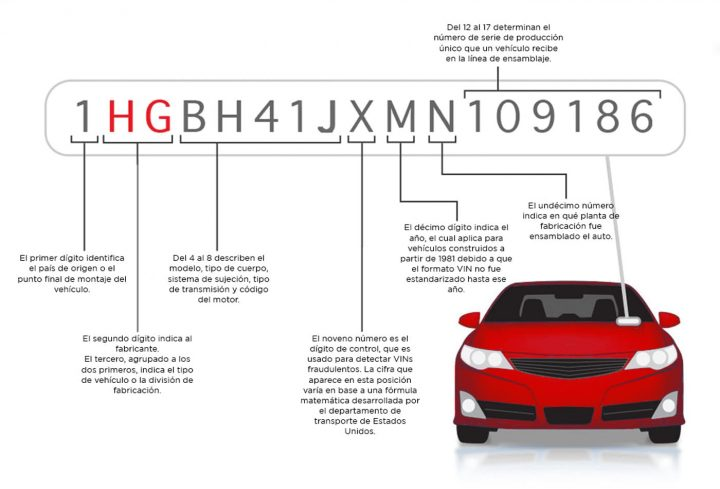

In [35]:
cols_nulls = ['make', 'seller', 'model', 'trim', 'body', 'transmission', 'vin']
for col in cols_nulls:
  df.fillna({col: 'UNKNOWN'}, inplace=True)

df['make']=df['make'].str.upper()
df['seller']=df['seller'].str.upper()
df['model']=df['model'].str.upper()
df['trim']=df['trim'].str.upper()
df['body']=df['body'].str.upper()

# Relleno de los nulos de la columna 'make'
df['vin_3letter']=df['vin'].str.slice(0,3)
dict_make_vin =df.loc[(df['vin'] != 'UNKNOWN') & (df['make'] != 'UNKNOWN'), ['vin_3letter', 'make']].set_index('vin_3letter')['make']
dict_make_vin=dict_make_vin.to_dict()

def fill_make(x):
    if x['make']=='UNKNOWN':
        V=x['vin_3letter']
        if V in dict_make_vin:
            return dict_make_vin[V]
    return x['make']

df['make'] = df.apply(fill_make, axis=1)
df.drop(df[df['make']=='UNKNOWN'].index,inplace=True)

# Relleno de los nulos de la columna 'seller'
df['vin_3letter']=df['vin'].str.slice(0,3)
dict_seller_vin =df.loc[(df['vin'] != 'UNKNOWN') & (df['seller'] != 'UNKNOWN'), ['vin_3letter', 'seller']].set_index('vin_3letter')['seller']
dict_seller_vin=dict_seller_vin.to_dict()

def fill_seller(x):
    if x['seller']=='UNKNOWN':
        V=x['vin_3letter']
        if V in dict_seller_vin:
            return dict_seller_vin[V]
    return x['seller']

df['seller'] = df.apply(fill_seller, axis=1)
df.drop(df[df['seller']=='UNKNOWN'].index,inplace=True)

# Relleno de los nulos de la columna 'model'
df['vin_mod_5let']=df['vin'].str.slice(3,8)
dict_model_vin =df.loc[(df['vin'] != 'UNKNOWN') & (df['model'] != 'UNKNOWN'), ['vin_mod_5let', 'model']].set_index('vin_mod_5let')['model']
dict_model_vin=dict_model_vin.to_dict()

def fill_model(x):
    if x['model']=='UNKNOWN':
        V=x['vin_mod_5let']
        if V in dict_model_vin:
            return dict_model_vin[V]
    return x['model']

df['model']=df.apply(fill_model,axis=1)
df.drop(df[df['model']=='UNKNOWN'].index,inplace=True)

# Relleno de los nulos de la columna 'trim'
df['vin_trim_5let']=df['vin'].str.slice(3,8)
dict_vin_trim =df.loc[(df['vin'] != 'UNKNOWN') & (df['trim'] != 'UNKNOWN'), ['vin_trim_5let', 'trim']].set_index('vin_trim_5let')['trim']
dict_vin_trim=dict_vin_trim.to_dict()

def fill_trim(x):
    if x['trim']=='UNKNOWN':
        V=x['vin_trim_5let']
        if V in dict_vin_trim:
            return dict_vin_trim[V]
    return x['trim']

df['trim']=df.apply(fill_trim,axis=1)
df.drop(df[df['trim']=='UNKNOWN'].index, inplace=True)

#Relleno de los nulos de la columna 'body'
df['vin_body_1let']=df['vin'].str.slice(4,5)
dict_vin_body =df.loc[(df['vin'] != 'UNKNOWN') & (df['body'] != 'UNKNOWN'), ['vin_body_1let', 'body']].set_index('vin_body_1let')['body']
dict_vin_body=dict_vin_body.to_dict()

def fill_body(x):
    if x['body']=='UNKNOWN':
        V=x['vin_body_1let']
        if V in dict_vin_body:
            return dict_vin_body[V]
    return x['body']

df['body']=df.apply(fill_body, axis=1)

# Relleno de los nulos de la columna 'transmission'
df['transmission'] = df.groupby(['make', 'model', 'year'])['transmission'].transform(lambda x: x.replace('UNKNOWN',x.mode()[0]))
df['transmission']=df.groupby(['make', 'year'])['transmission'].transform(lambda x: x.replace('UNKNOWN',x.mode()[0]))
df['transmission']=df.groupby(['make', 'model'])['transmission'].transform(lambda x: x.replace('UNKNOWN',x.mode()[0]))
df['transmission']=df.groupby(['year', 'model'])['transmission'].transform(lambda x: x.replace('UNKNOWN',x.mode()[0]))
df.drop(df[df['transmission']=='UNKNOWN'].index,inplace=True)

# Relleno de los nulos de la columna 'color', 'interior', 'state' y 'saledate'
df['color'] = df.groupby(['make','model','year'])['color'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))
df['interior'] = df.groupby(['make','model','year'])['interior'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))
df['state'] = df.groupby(['make','model','year'])['state'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))
df['saledate'] = df.groupby(['make','model','year'])['saledate'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))

df.drop(columns=['vin_3letter', 'vin_mod_5let','vin_trim_5let', 'vin_body_1let'],inplace=True)


/tmp/ipython-input-3352861006.py:95: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['state'] = df.groupby(['make','model','year'])['state'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))


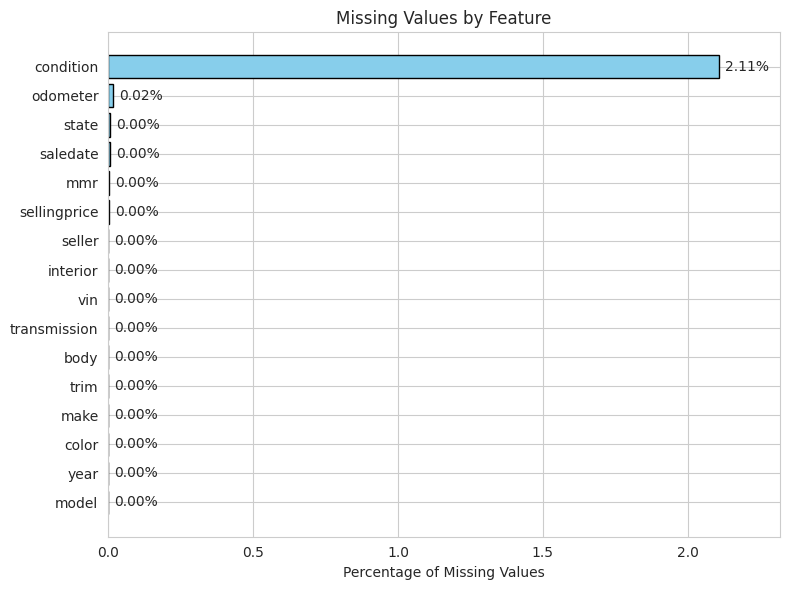

In [36]:
nulls_after = df.isna().sum() / len(df) * 100
nulls_after = nulls_after.sort_values(ascending=False)

missing = nulls_after.sort_values(ascending=True)

plt.figure(figsize=(8, 6))
sns.set_style('whitegrid')
bars = plt.barh(missing.index, missing.values, color='skyblue', edgecolor='k')
plt.xlabel('Percentage of Missing Values')
plt.title('Missing Values by Feature')
plt.xlim(0, missing.max() * 1.1)

# Annotate bars with percentage values
offset = missing.max() * 0.01
for bar in bars:
    width = bar.get_width()
    plt.text(width + offset, bar.get_y() + bar.get_height() / 2, f"{width:.2f}%", va='center')

plt.tight_layout()
plt.show()

Aquí podemos ver la base sin las columnas innecesarias que no consideraremos para análisis posteriores, en caso de requerir algún dato de estas columnas, finalmente integraremos un dataset con todas las columnas iniciales pero con los datos imputados.

Por consiguiente, defino la función que realizará el proceso de imputación multivariada en el conjunto de datos usando
    
+ RandomForestRegressor para columnas numérica
+ RandomForestClassifier para columnas categóricas

Veamos:

In [37]:
def multivariate_imputation_optimized(df, numeric_cols):
    """
    Realiza imputación multivariada optimizada usando ExtraTrees para velocidad.
    Especifica estimadores diferentes para columnas numéricas y categóricas.
    """
    df_imputed = df.copy()

    # Definir los estimadores: ExtraTreesRegressor para numéricas (velocidad)
    # y ExtraTreesClassifier para categóricas (precisión discreta)
    imputer = IterativeImputer(
        # Estimador base para columnas numéricas. Usamos ExtraTrees para velocidad.
        estimator=ExtraTreesRegressor(n_estimators=50, max_depth=5, random_state=42, n_jobs=-1),
        max_iter=3, # Reducido a 3 para velocidad, se puede aumentar a 5.
        initial_strategy='median',
        # Especificamos qué índices de columnas (en X_impute) deben usar un CLASIFICADOR
        imputation_order='random', # Orden aleatorio para evitar sesgos
        skip_complete=True,
        random_state=42
    )

    # 3. Aplicar imputación y reasignar (IterativeImputer detectará las columnas que necesitan CLASIFICADOR
    # si usamos un estimador base distinto, pero es más eficiente especificar el tipo de imputación)

    # Convertir el DataFrame a NumPy array
    X_impute = df_imputed[numeric_cols].values

    # Aplicar la imputación (IterativeImputer usará el Regressor en todas las columnas por defecto,
    # por lo que el post-procesamiento es clave).
    imputed_data = imputer.fit_transform(X_impute)

    # Reemplazar las columnas originales con los datos imputados
    df_imputed[numeric_cols] = imputed_data

    return df_imputed

In [38]:
# Se transforman las variables 'odometer' y 'sellingprice' a numéricas
df['odometer']=df['odometer'].astype(float)
df['sellingprice']=df['sellingprice'].astype(float)

# Identificar las columnas por tipo
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Aplicar la función de imputación
df_imputado_rf = multivariate_imputation_optimized(df.copy(), numeric_cols)

# Mostrar el conteo de valores nulos después de la imputación
print("Conteo de valores nulos después de la imputación con RF:")
print(df_imputado_rf.isna().sum())

Conteo de valores nulos después de la imputación con RF:
year             0
make             0
model            0
trim             0
body             0
transmission     0
vin              0
state           26
condition        0
odometer         0
color            0
interior         0
seller           0
mmr              0
sellingprice     0
saledate        26
dtype: int64


In [39]:
df.dropna(inplace=True)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 545930 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   year          545930 non-null  int64         
 1   make          545930 non-null  object        
 2   model         545930 non-null  object        
 3   trim          545930 non-null  object        
 4   body          545930 non-null  object        
 5   transmission  545930 non-null  object        
 6   vin           545930 non-null  object        
 7   state         545930 non-null  object        
 8   condition     545930 non-null  float64       
 9   odometer      545930 non-null  float64       
 10  color         545930 non-null  object        
 11  interior      545930 non-null  object        
 12  seller        545930 non-null  object        
 13  mmr           545930 non-null  float64       
 14  sellingprice  545930 non-null  float64       
 15  saledate      545930 n

In [41]:
# Mostrar el conteo de valores nulos después de la imputación
print("Conteo de valores nulos después de la imputación con RF:")
print(df_imputado_rf[df_imputado_rf['saledate'] != 'UNKNOWN'])

Conteo de valores nulos después de la imputación con RF:
          year    make                model         trim       body  \
0       2015.0     KIA              SORENTO           LX        SUV   
1       2015.0     KIA              SORENTO           LX        SUV   
2       2014.0     BMW             3 SERIES   328I SULEV      SEDAN   
3       2015.0   VOLVO                  S60           T5      SEDAN   
4       2014.0     BMW  6 SERIES GRAN COUPE         650I      SEDAN   
...        ...     ...                  ...          ...        ...   
558832  2015.0     KIA                 K900       LUXURY      SEDAN   
558833  2012.0     RAM                 2500  POWER WAGON   CREW CAB   
558834  2012.0     BMW                   X5    XDRIVE35D        SUV   
558835  2015.0  NISSAN               ALTIMA        2.5 S      SEDAN   
558836  2014.0    FORD                F-150          XLT  SUPERCREW   

       transmission                vin state  condition  odometer   color  \
0         aut



No obstante, para dar respuesta a la pregunta: **_¿Cuál es el número máximo de veces que se ha revendido un vehículo en nuestra base de datos y cuáles son las caracterícticas de éste?,_** no es necesario en este momento imputar los datos.

In [42]:
conteo_vin = df['vin'].value_counts()
conteo_vin.head(3)

,count
vin,
wbanv13588cz57827,5
trusc28n241022003,4
5uxfe43579l274932,4


El número máximo de veces que se ha revendido un vehículo en nuestra base de datos es $5.$ Esto nos permite definir una distribución discreta para la variable número de veces que se ha revendido un vehículo y podríamos observar cómo se devalua el precio del vehículo según su reventa.

## Analisis Visual

El gráfico de barras muestra la distribución del precio de venta promedio de los vehículos según su fabricante. Se observa una marcada diferencia entre los fabricantes de gama alta y el resto, evidenciando una clara segmentación en los valores de venta. Esta dispersión sugiere la existencia de más de un grupo o clúster dentro del mercado, lo que abre la posibilidad de aplicar técnicas de análisis no supervisado para identificar patrones y segmentaciones más precisas.

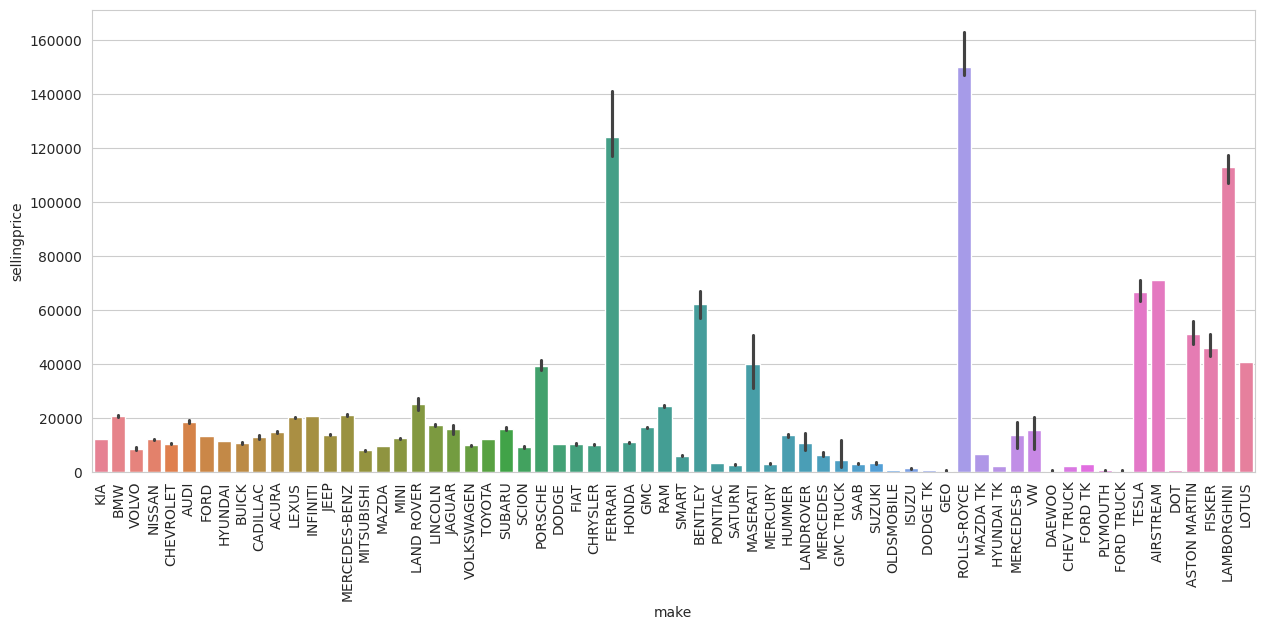

In [43]:
plt.figure(figsize=(15,6))
palette = sns.color_palette("tab20", n_colors=20)
sns.barplot(data=df_imputado_rf,
            x='make',
            y='sellingprice',
            estimator='median',
            hue='make')
plt.xticks(rotation=90)
plt.show()

El gráfico de barras muestra la distribución del número de ventas por fabricante. Se observa que FORD concentra la mayor cantidad de vehículos vendidos, destacándose como la marca con mayor presencia. En contraste, los fabricantes de gama alta presentan una demanda significativamente menor, lo que sugiere que su participación se orienta a un segmento más exclusivo y de menor volumen comercial.

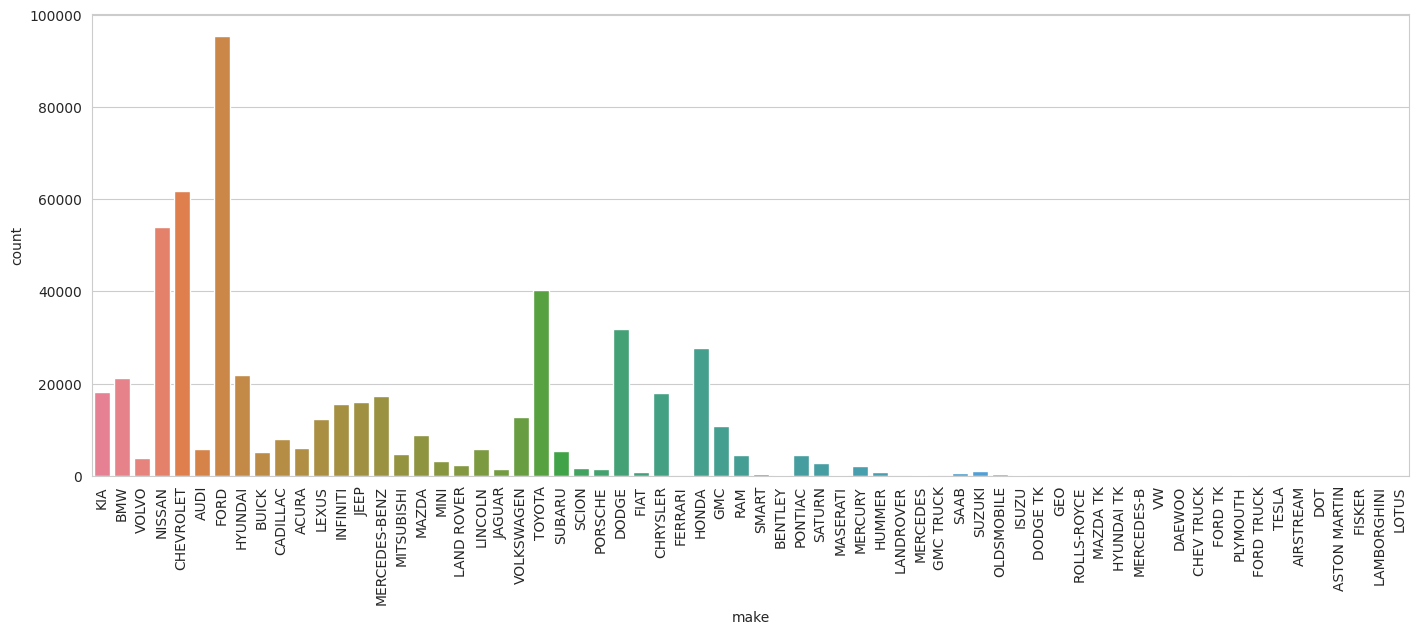

In [44]:
plt.figure(figsize=(17,6))
sns.countplot(data=df_imputado_rf,
              x='make',
              hue='make')
plt.xticks(rotation=90)
plt.show()

El boxplot muestra la distribución del precio de venta de los vehículos según el tipo de transmisión. En general, las distribuciones de transmisión automática y manual presentan comportamientos similares en términos de rango y mediana. Sin embargo, se observa que la transmisión automática concentra una mayor cantidad de valores atípicos, lo que indica la presencia de algunos vehículos con precios significativamente superiores al resto.

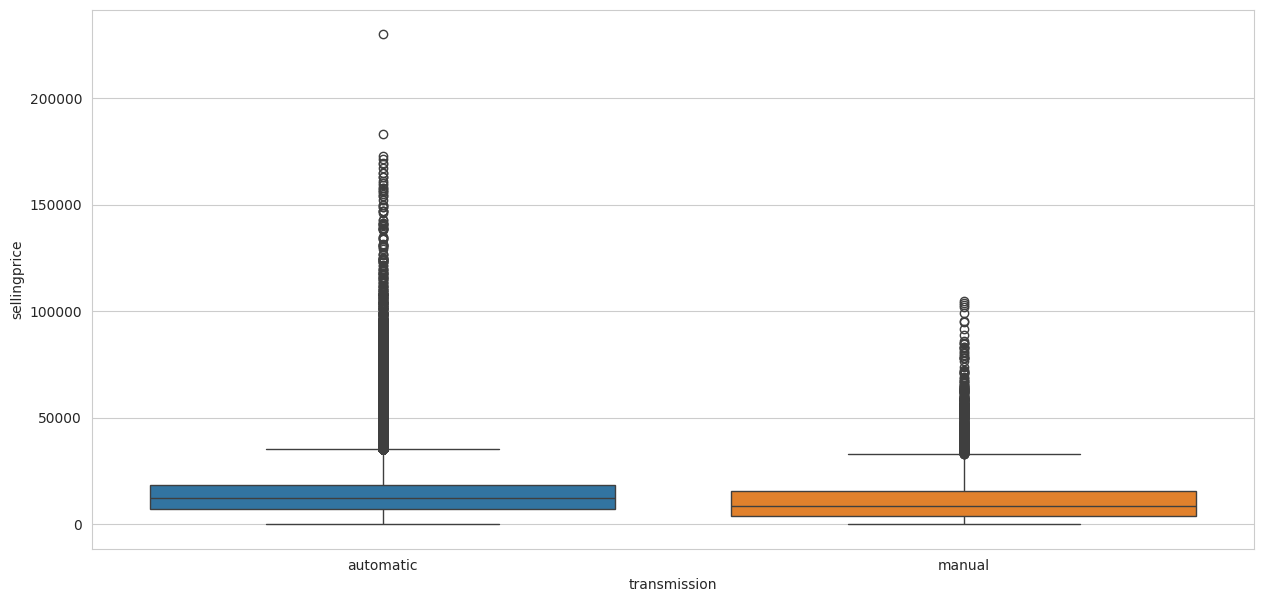

In [45]:
plt.figure(figsize=(15,7))
sns.boxplot(data=df_imputado_rf,
            x='transmission',
            y='sellingprice',
            hue='transmission')
plt.show()

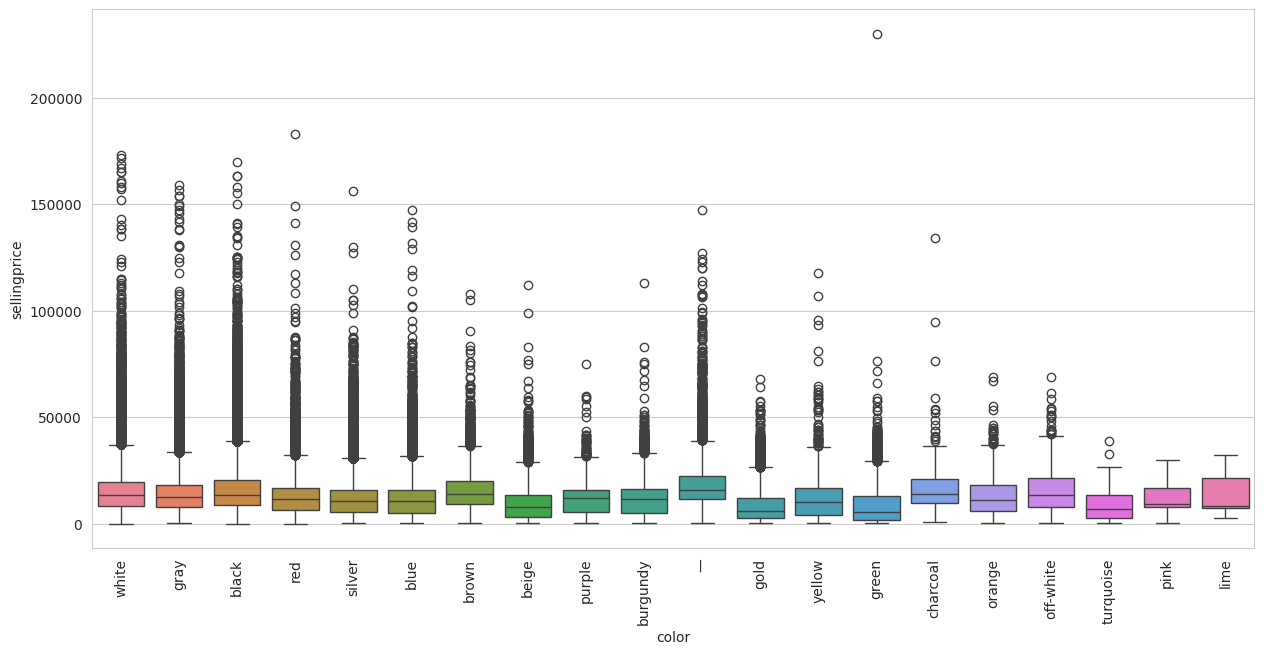

In [46]:
plt.figure(figsize=(15,7))
sns.boxplot(data=df_imputado_rf,
            x='color',
            y='sellingprice',
            hue='color')
plt.xticks(rotation=90)
plt.show()

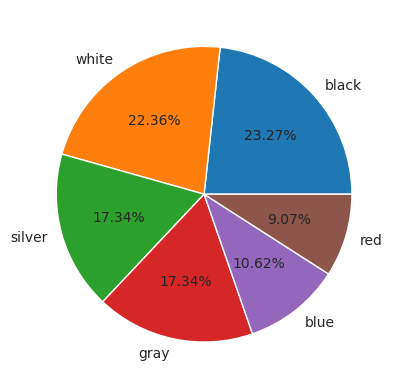

In [47]:
c=df['color'].value_counts().head(6)
plt.pie(x=c,labels=c.index,autopct='%0.2f%%')
plt.show()

Se observa una fuerte correlación positiva entre el precio de venta (sellingprice) y el MMR (0.98), lo que indica que a medida que el valor de referencia del mercado aumenta, también lo hace el precio de venta. Asimismo, el año del vehículo presenta una correlación moderada y positiva con el precio (0.59), lo que sugiere que los modelos más recientes tienden a venderse a precios más altos.

Por el contrario, el odómetro muestra una correlación negativa significativa con el precio (-0.58), reflejando que los vehículos con mayor kilometraje suelen tener valores de venta más bajos. Finalmente, la condición del vehículo presenta una relación positiva, aunque más débil (0.33), indicando que un mejor estado físico o mecánico contribuye a un mayor precio, pero con menor impacto comparativo frente a otras variables.

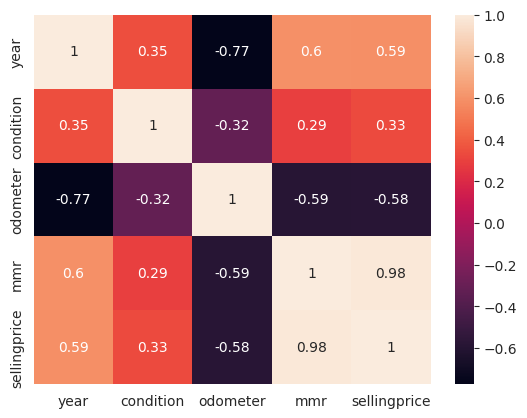

In [48]:
sns.heatmap(df_imputado_rf.corr(numeric_only=True),annot=True)
plt.show()

La matriz de correlación de Cramer’s V evidencia relaciones fuertes entre varias variables categóricas del conjunto de datos. La asociación más destacada se presenta entre make y model (0.90), lo que indica que la marca del vehículo determina en gran medida el modelo correspondiente, algo esperado debido a la dependencia jerárquica entre ambas variables. También se observa una asociación moderada entre make y trim (0.68), así como entre model y body (0.82), lo que sugiere que las versiones y tipos de carrocería suelen estar estrechamente vinculadas al modelo específico.

En contraste, variables como state, color e interior muestran asociaciones débiles o nulas con el resto (valores menores a 0.2), lo que indica que estas características son más independientes y no dependen directamente de las demás variables del vehículo.

En conjunto, la matriz muestra que las variables estructurales del automóvil (marca, modelo, tipo y versión) están fuertemente relacionadas entre sí, mientras que las variables estéticas o geográficas presentan una mayor independencia dentro del conjunto de datos.

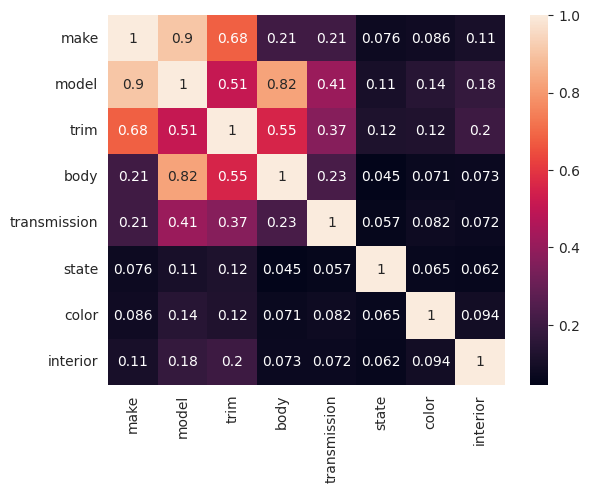

In [49]:
from scipy.stats import chi2_contingency
def cramers_v(x, y):
    """Calcula la correlación de Cramér's V entre dos variables categóricas"""
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

def matriz_correlacion_categorica(df, categorical_cols):
    """Crea matriz de correlación para variables categóricas usando Cramér's V"""
    n = len(categorical_cols)
    corr_matrix = np.ones((n, n))

    for i in range(n):
        for j in range(i+1, n):
            corr_matrix[i, j] = cramers_v(df[categorical_cols[i]], df[categorical_cols[j]])
            corr_matrix[j, i] = corr_matrix[i, j]

    corr_df = pd.DataFrame(corr_matrix, index=categorical_cols, columns=categorical_cols)
    return corr_df

# USO
categorical_cols = ['make', 'model', 'trim', 'body', 'transmission', 'state', 'color', 'interior']
matriz_cramer = matriz_correlacion_categorica(df_imputado_rf, categorical_cols)
sns.heatmap(matriz_cramer, annot=True)
plt.show()

La línea de tiempo muestra la evolución del precio de venta promedio de los vehículos según su año de fabricación. Se observa una tendencia creciente sostenida a lo largo de los años, con incrementos más pronunciados a partir del año 2000. Este comportamiento sugiere que los modelos más recientes alcanzan precios significativamente superiores, posiblemente debido a avances tecnológicos, mejoras en el equipamiento y mayor valor percibido en el mercado. A partir de 2010, el crecimiento se acelera aún más, alcanzando su punto más alto en los modelos fabricados hacia 2015.

/tmp/ipython-input-4068831957.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


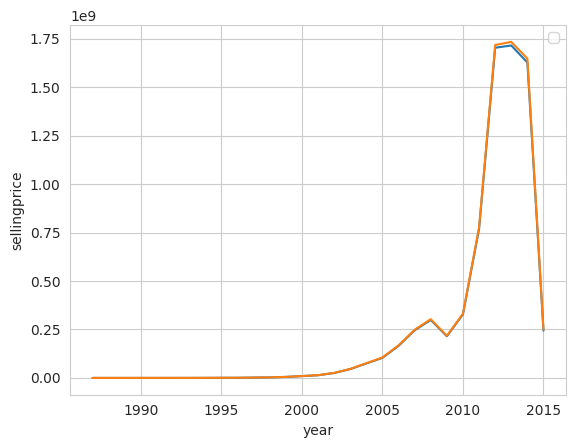

In [50]:
g = df_imputado_rf.pivot_table(index='year',values=['sellingprice', 'mmr'],aggfunc='sum').reset_index()

sns.lineplot(data=g,x='year',y='sellingprice')
sns.lineplot(data=g,x='year',y='mmr')
plt.legend()
plt.show()

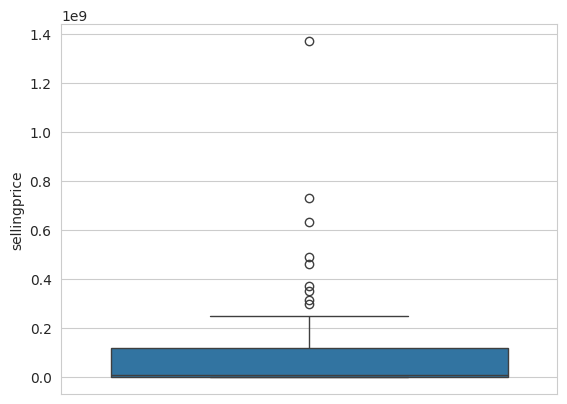

In [51]:
test_df = df_imputado_rf[['make', 'sellingprice']].groupby('make').sum()
sns.boxplot(data=test_df,y='sellingprice')
plt.show()

/tmp/ipython-input-3327920642.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


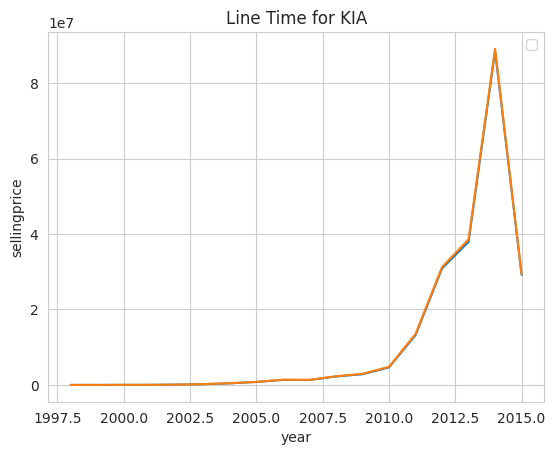

/tmp/ipython-input-3327920642.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


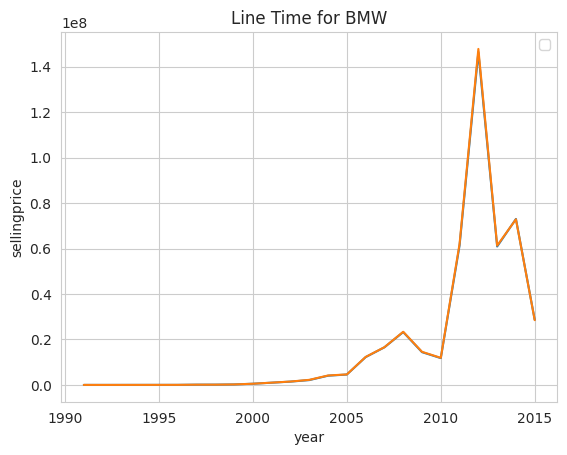

/tmp/ipython-input-3327920642.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


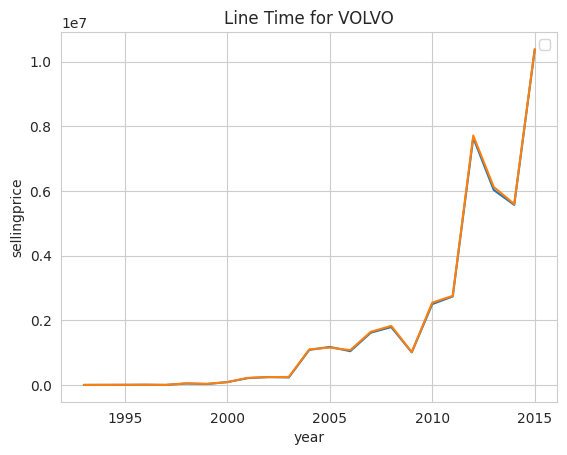

/tmp/ipython-input-3327920642.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


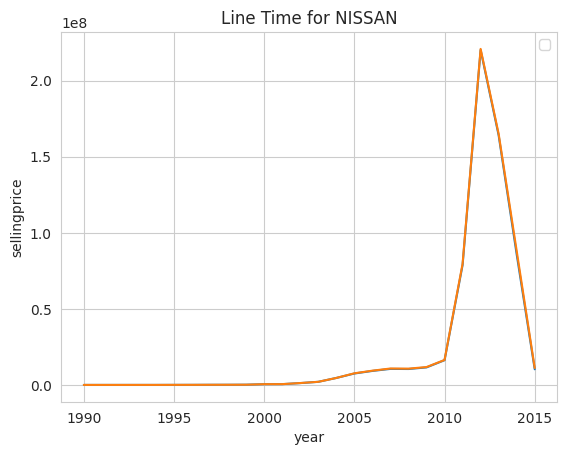

/tmp/ipython-input-3327920642.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


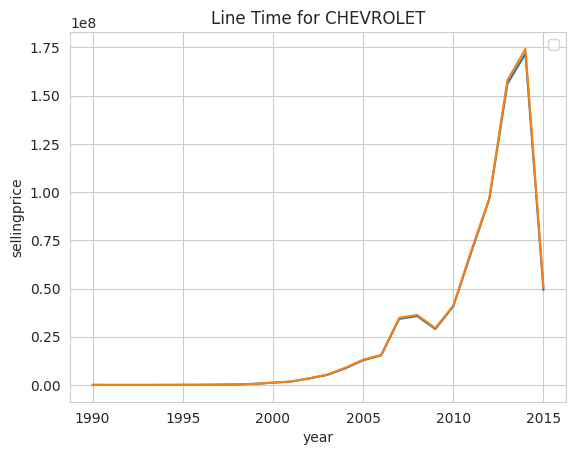

/tmp/ipython-input-3327920642.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


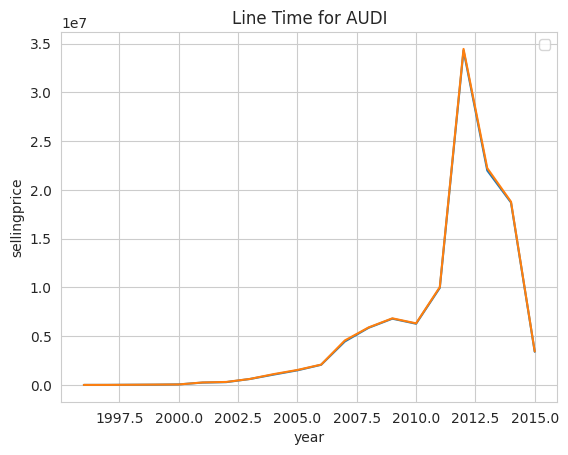

/tmp/ipython-input-3327920642.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


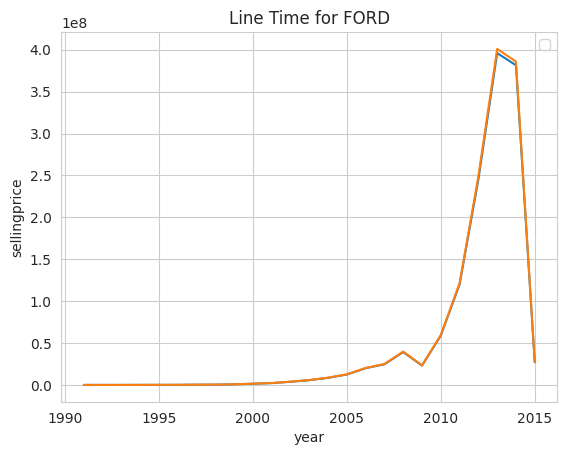

/tmp/ipython-input-3327920642.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


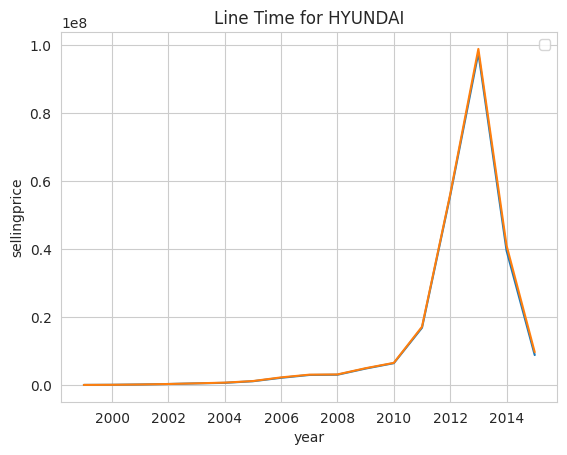

/tmp/ipython-input-3327920642.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


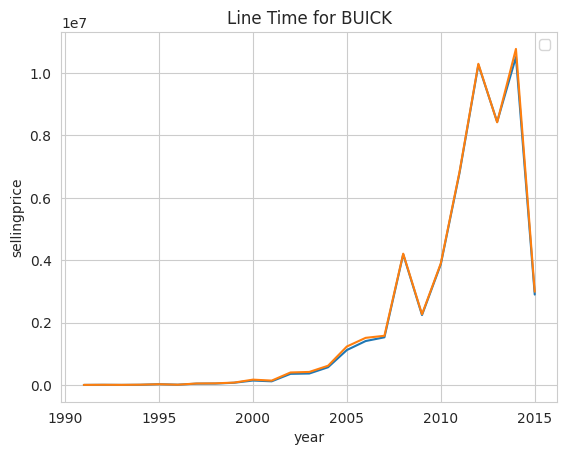

/tmp/ipython-input-3327920642.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


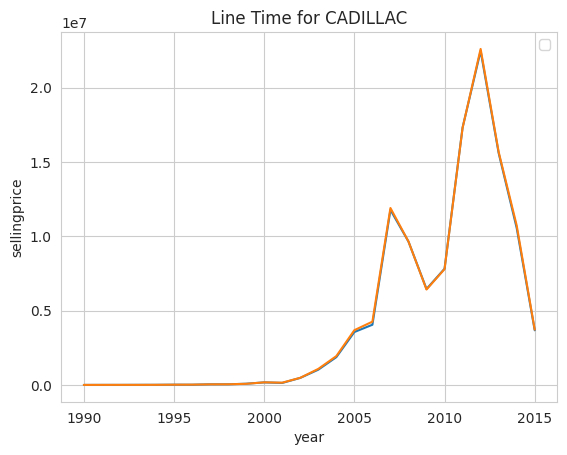

/tmp/ipython-input-3327920642.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


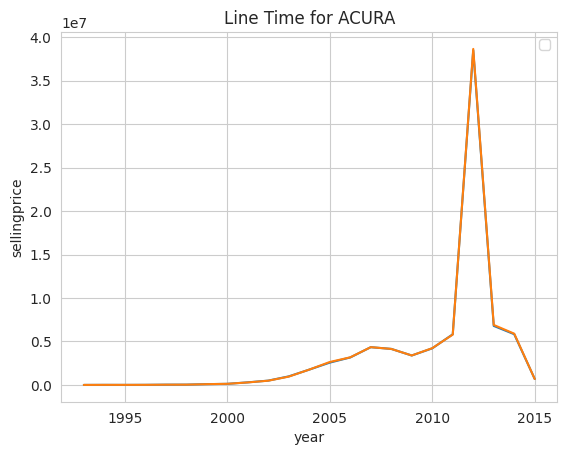

/tmp/ipython-input-3327920642.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


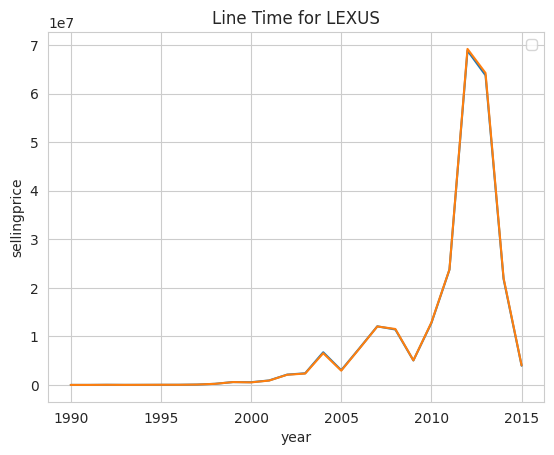

/tmp/ipython-input-3327920642.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


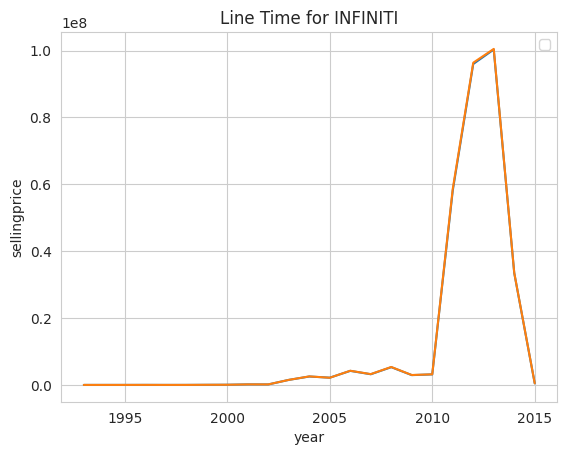

/tmp/ipython-input-3327920642.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


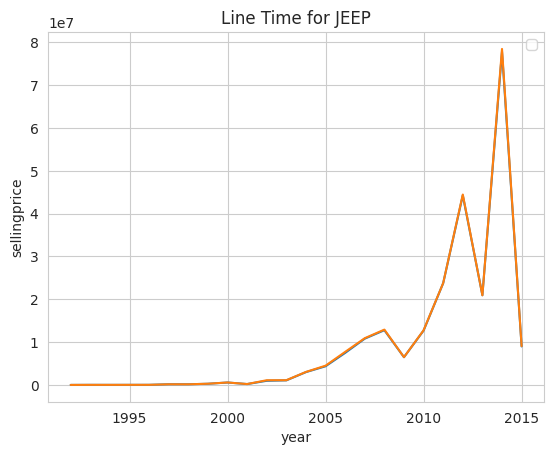

/tmp/ipython-input-3327920642.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


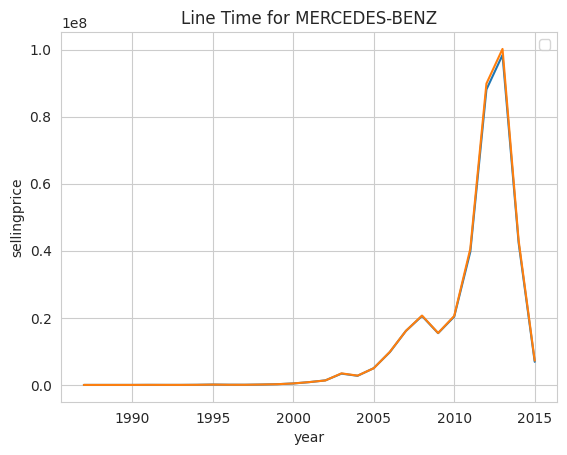

/tmp/ipython-input-3327920642.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


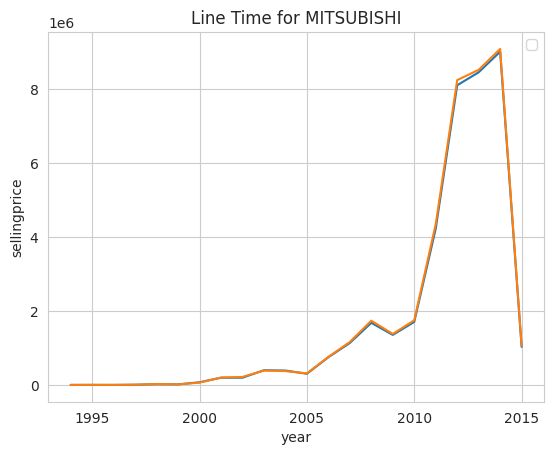

/tmp/ipython-input-3327920642.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


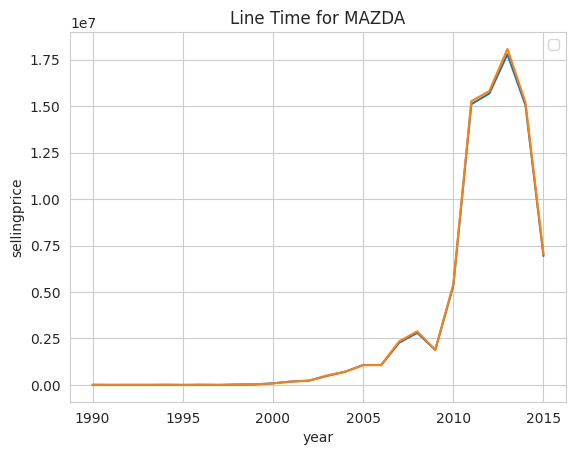

/tmp/ipython-input-3327920642.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


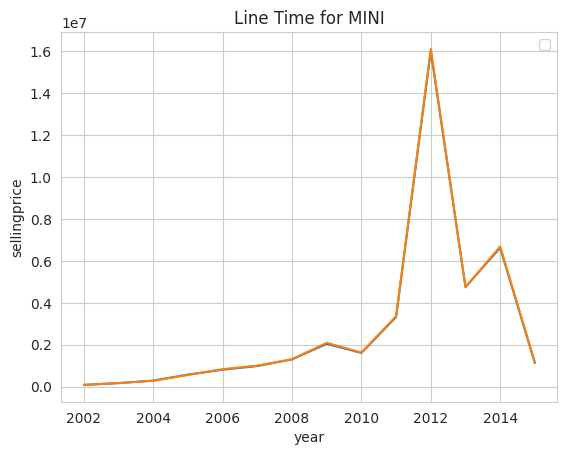

/tmp/ipython-input-3327920642.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


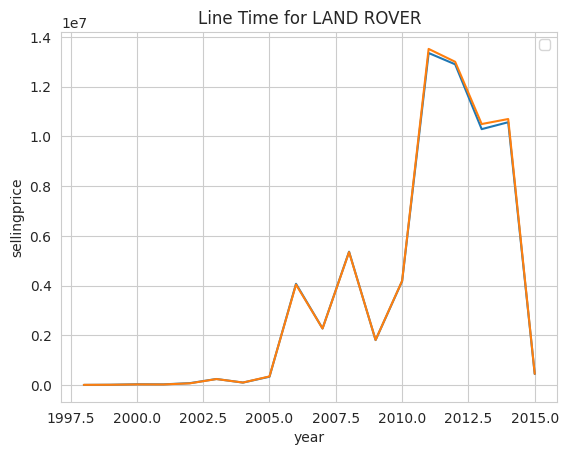

/tmp/ipython-input-3327920642.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


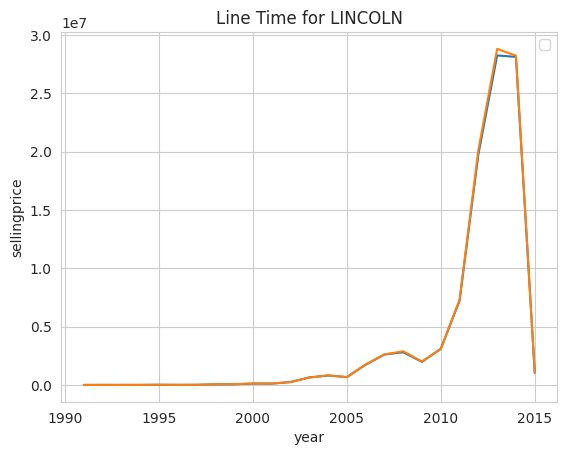

/tmp/ipython-input-3327920642.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


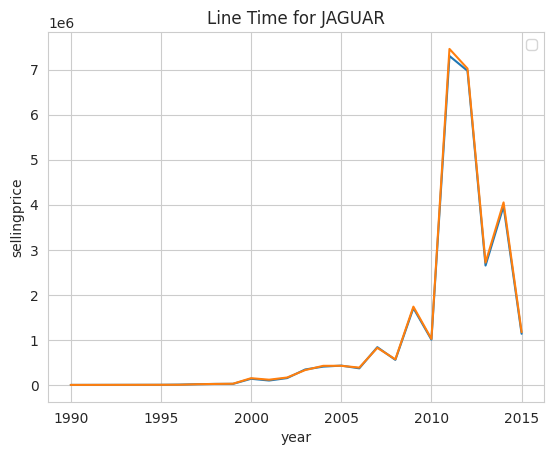

/tmp/ipython-input-3327920642.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


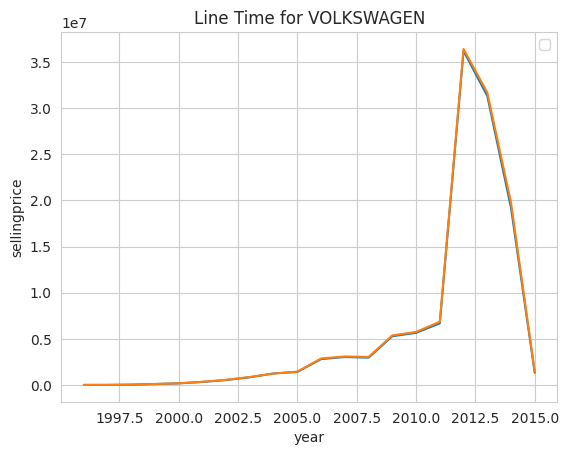

/tmp/ipython-input-3327920642.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


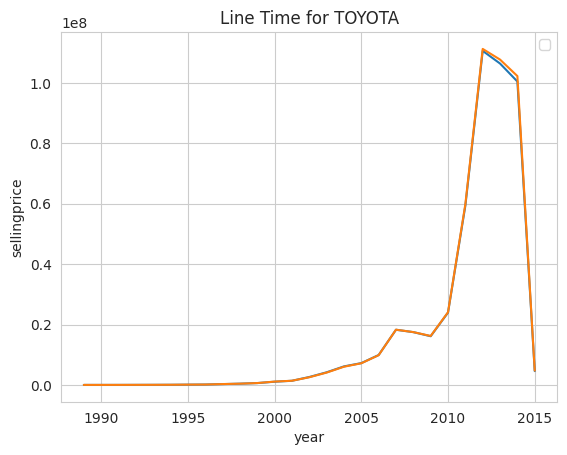

/tmp/ipython-input-3327920642.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


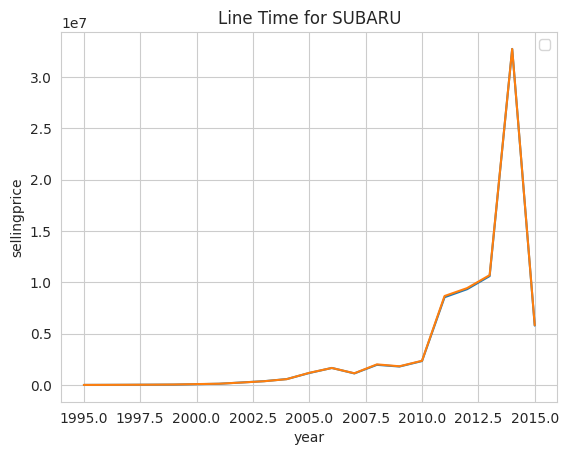

/tmp/ipython-input-3327920642.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


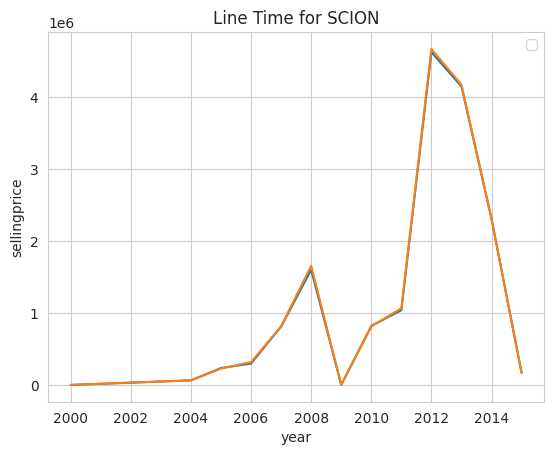

/tmp/ipython-input-3327920642.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


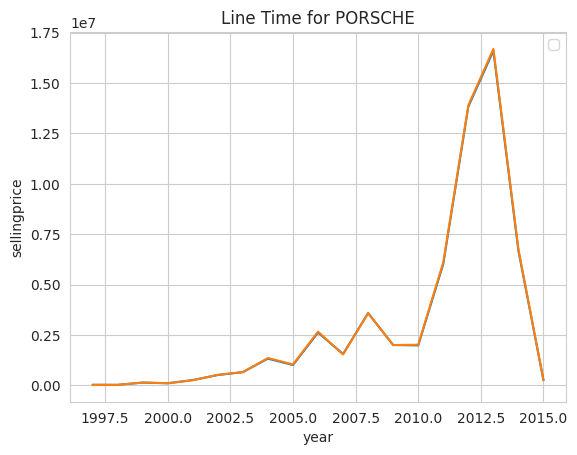

/tmp/ipython-input-3327920642.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


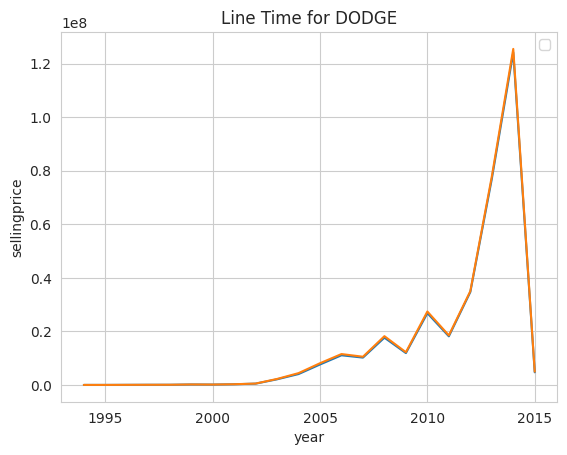

/tmp/ipython-input-3327920642.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


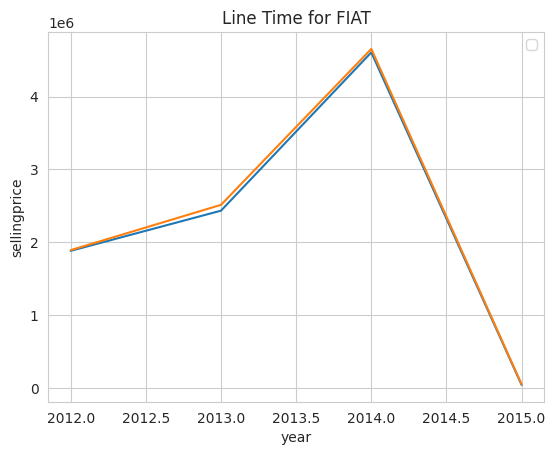

/tmp/ipython-input-3327920642.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


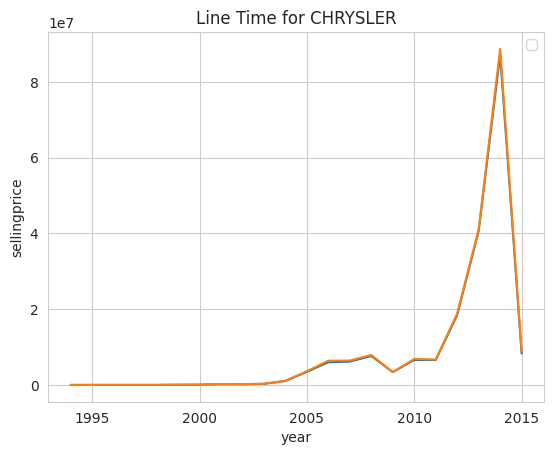

/tmp/ipython-input-3327920642.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


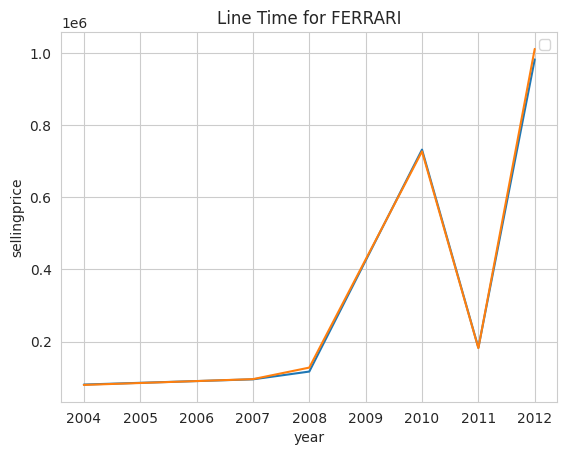

/tmp/ipython-input-3327920642.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


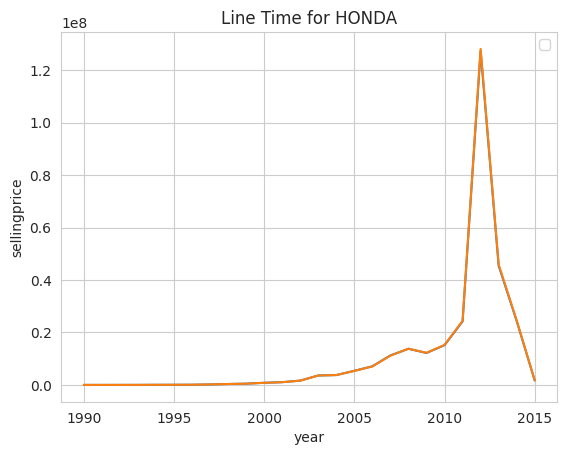

/tmp/ipython-input-3327920642.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


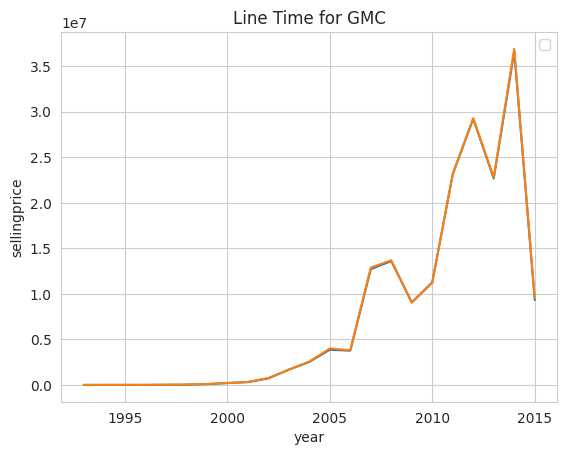

/tmp/ipython-input-3327920642.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


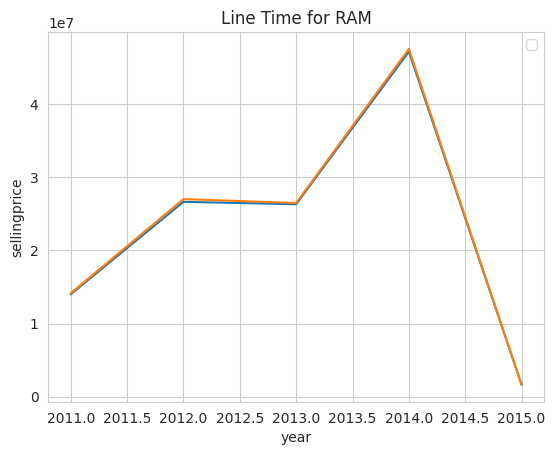

/tmp/ipython-input-3327920642.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


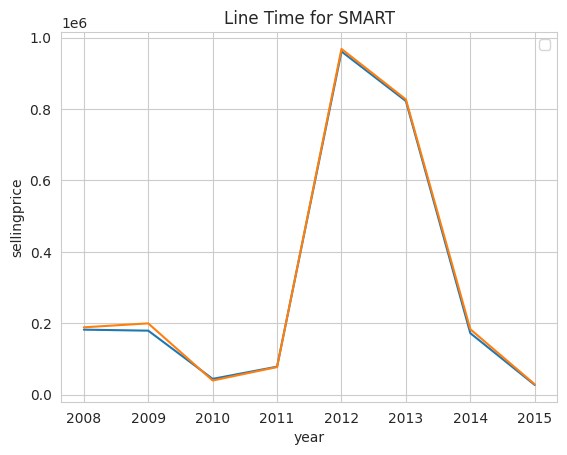

/tmp/ipython-input-3327920642.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


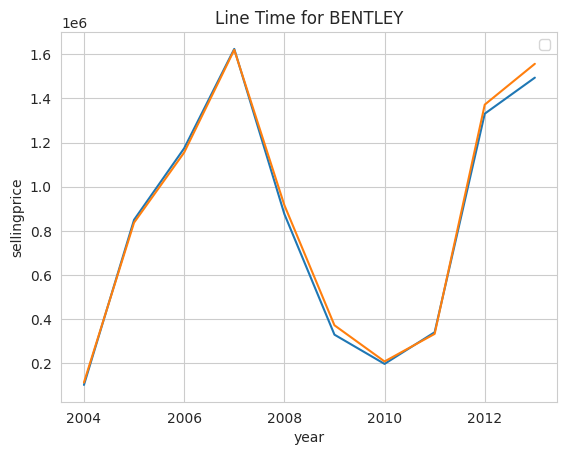

/tmp/ipython-input-3327920642.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


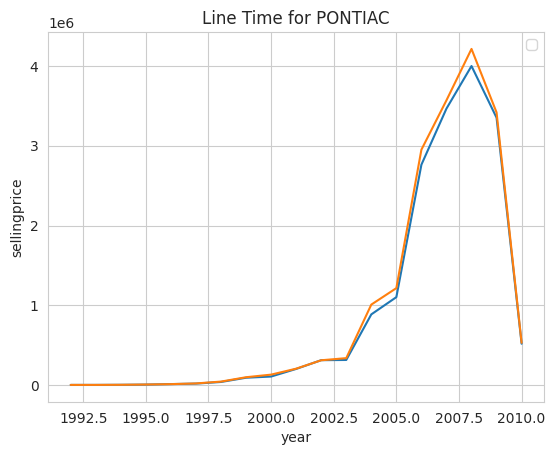

/tmp/ipython-input-3327920642.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


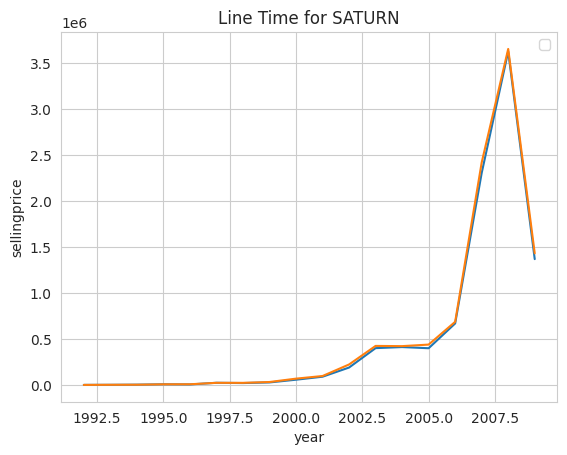

/tmp/ipython-input-3327920642.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


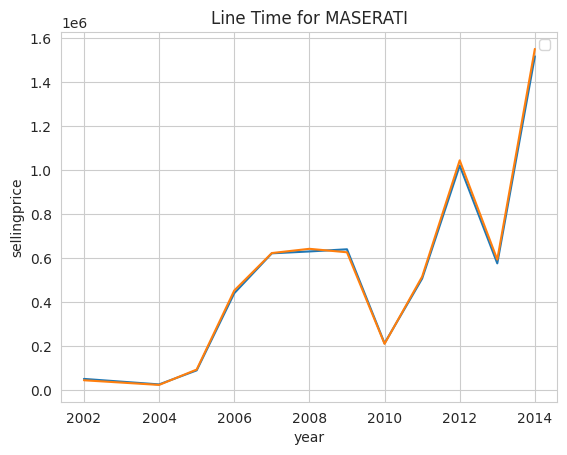

/tmp/ipython-input-3327920642.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


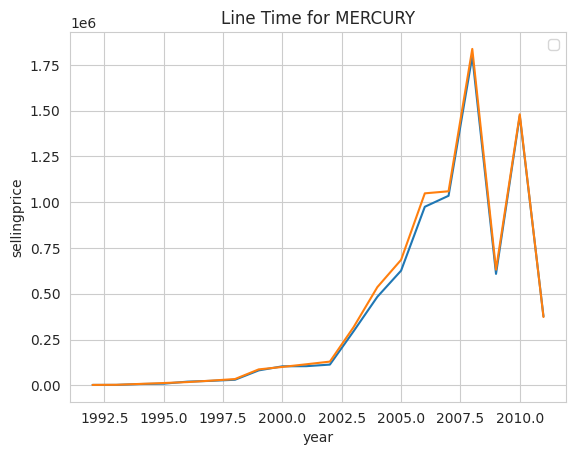

/tmp/ipython-input-3327920642.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


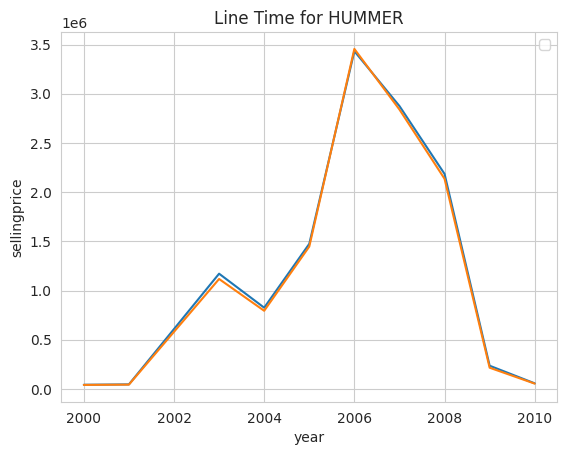

/tmp/ipython-input-3327920642.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


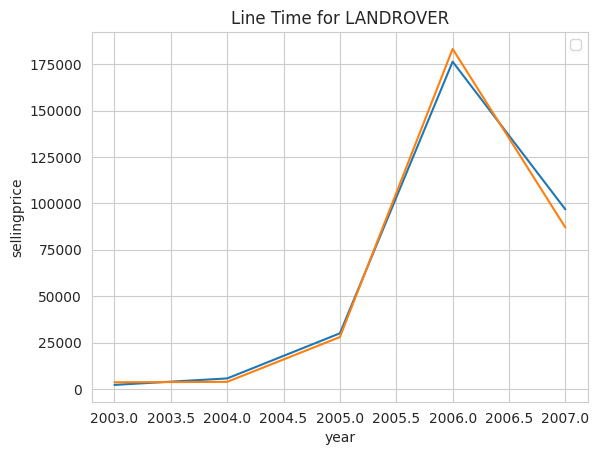

/tmp/ipython-input-3327920642.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


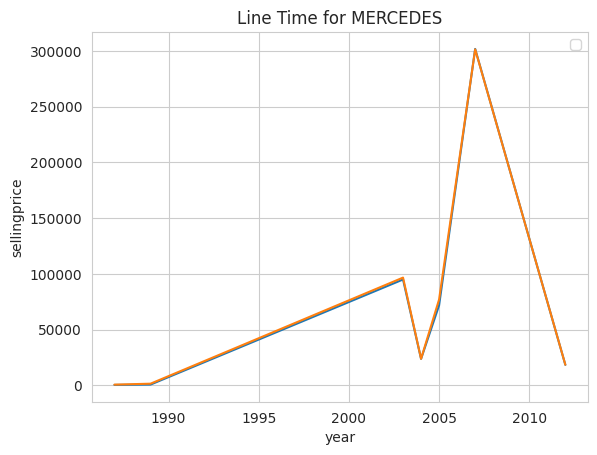

/tmp/ipython-input-3327920642.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


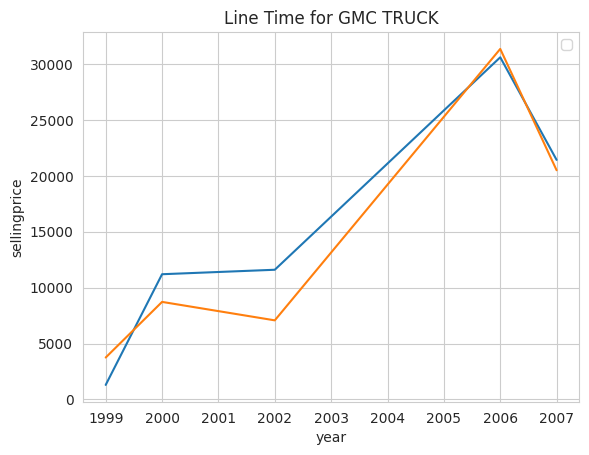

/tmp/ipython-input-3327920642.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


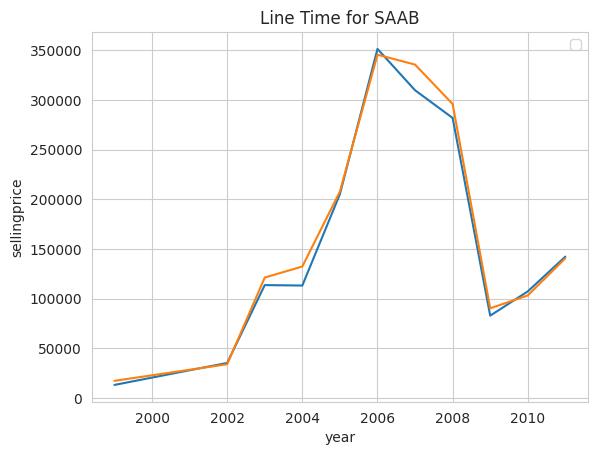

/tmp/ipython-input-3327920642.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


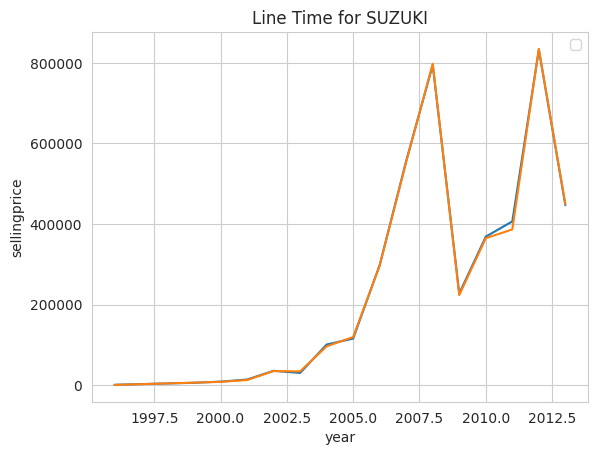

/tmp/ipython-input-3327920642.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


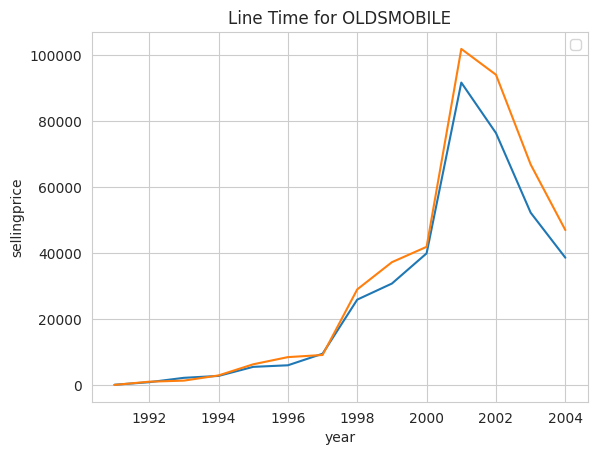

/tmp/ipython-input-3327920642.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


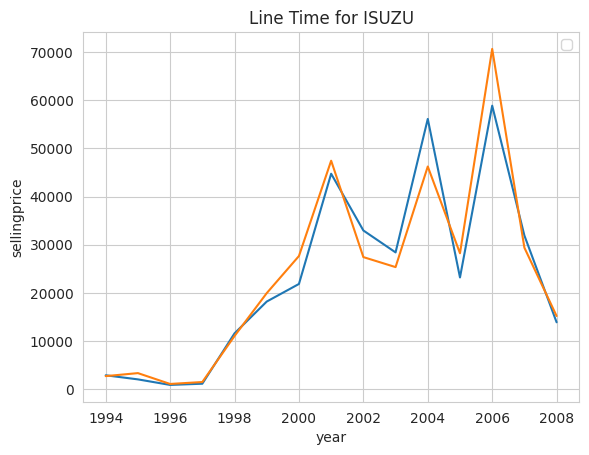

/tmp/ipython-input-3327920642.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


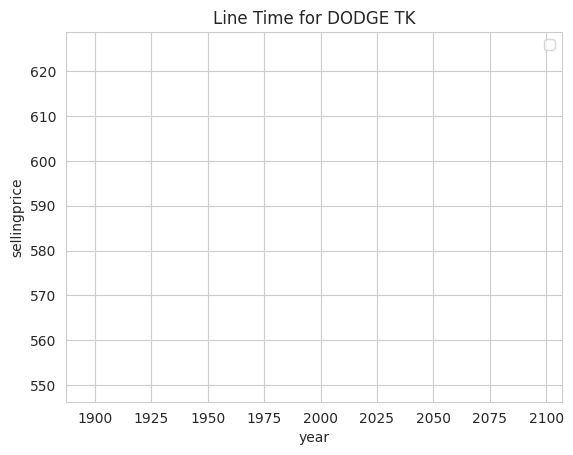

/tmp/ipython-input-3327920642.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


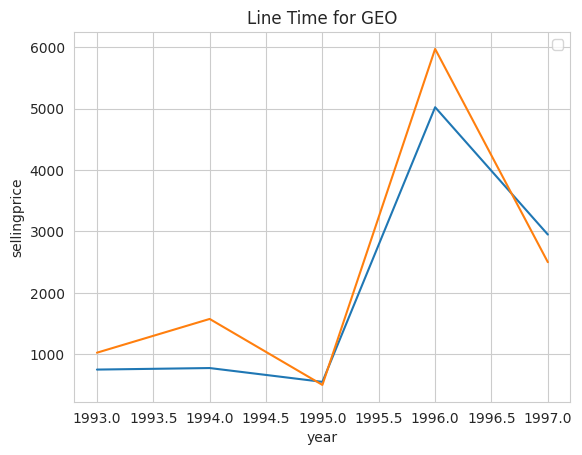

/tmp/ipython-input-3327920642.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


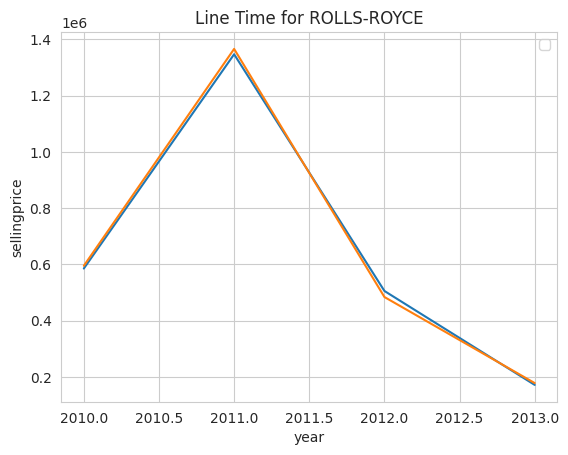

/tmp/ipython-input-3327920642.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


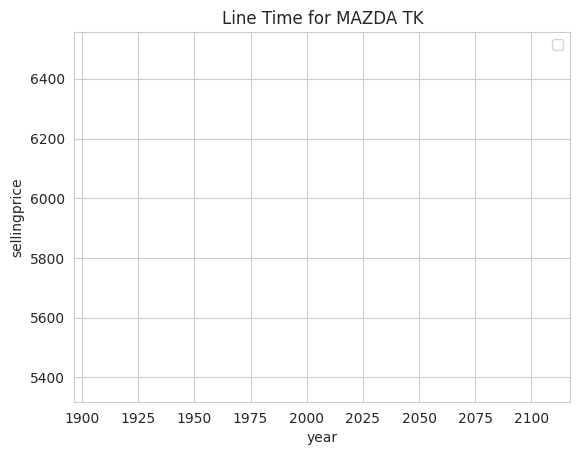

/tmp/ipython-input-3327920642.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


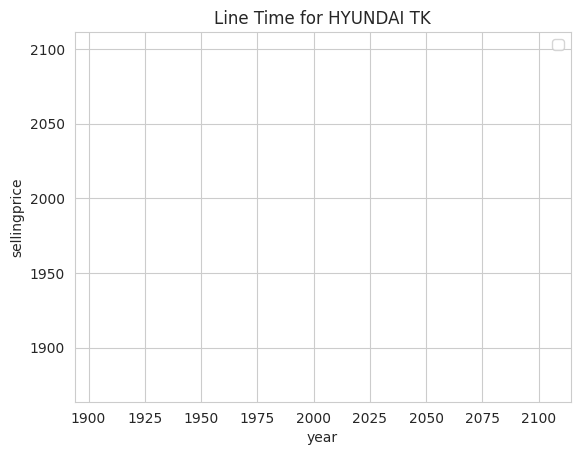

/tmp/ipython-input-3327920642.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


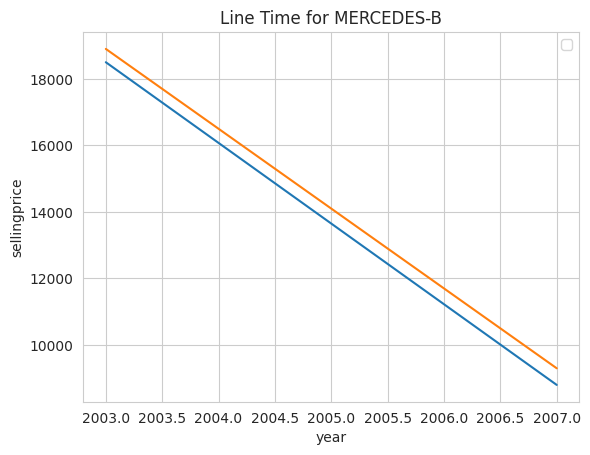

/tmp/ipython-input-3327920642.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


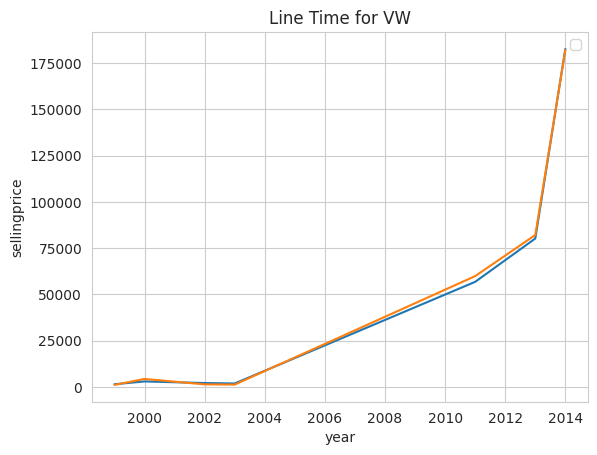

/tmp/ipython-input-3327920642.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


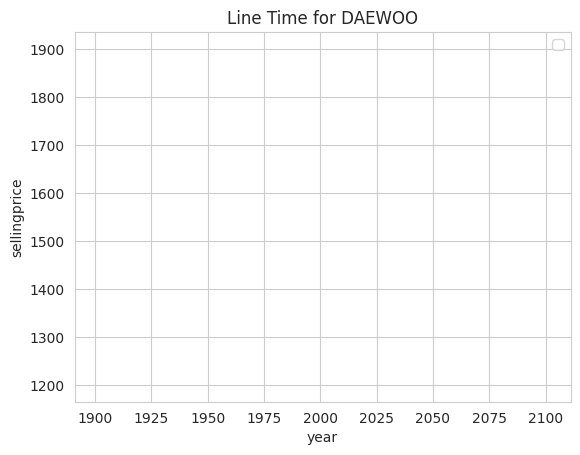

/tmp/ipython-input-3327920642.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


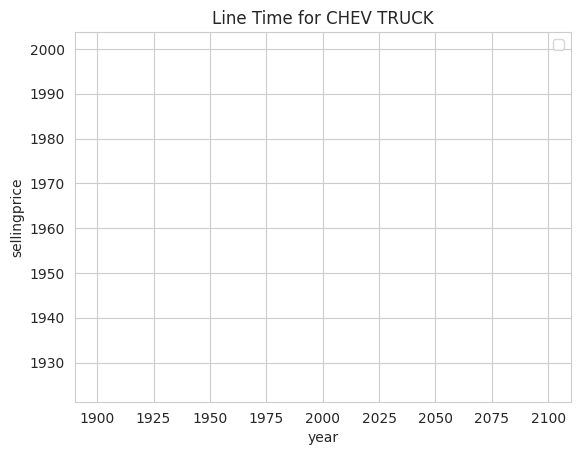

/tmp/ipython-input-3327920642.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


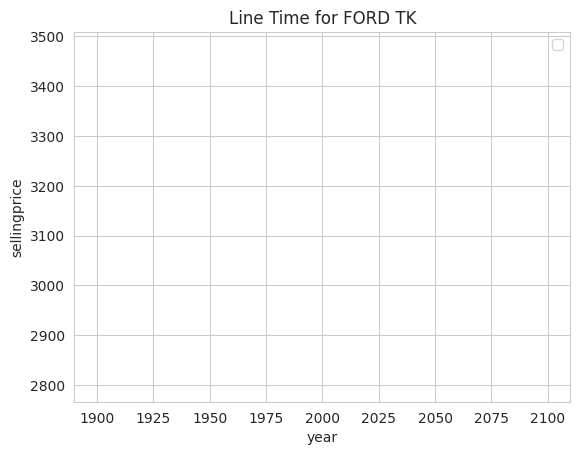

/tmp/ipython-input-3327920642.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


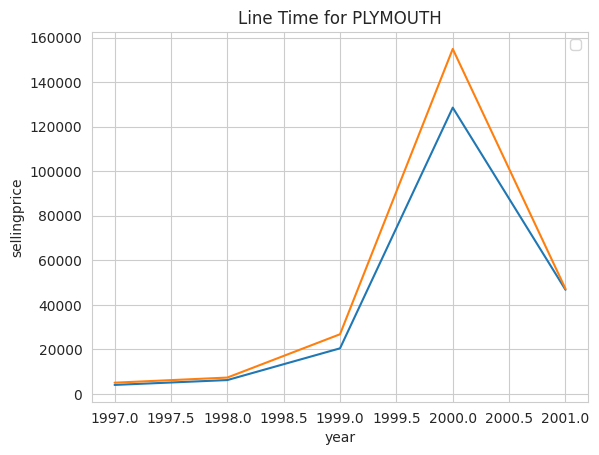

/tmp/ipython-input-3327920642.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


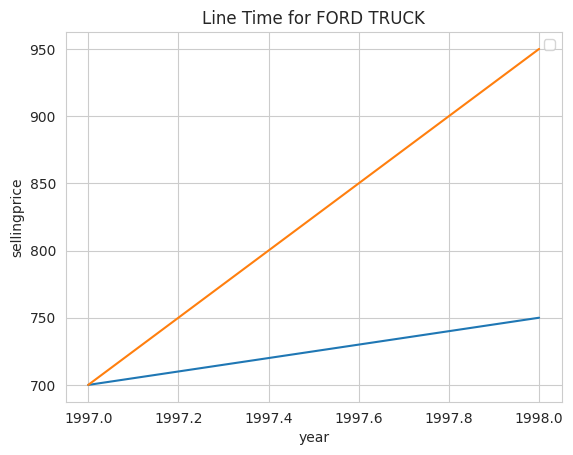

/tmp/ipython-input-3327920642.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


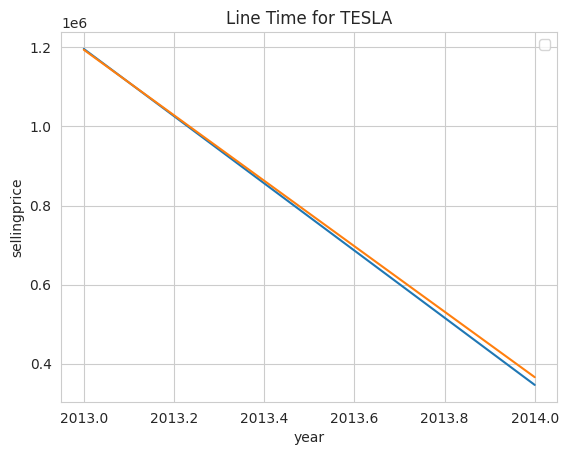

/tmp/ipython-input-3327920642.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


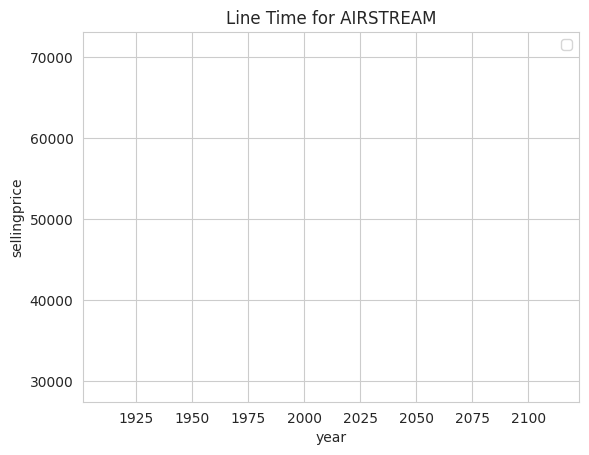

/tmp/ipython-input-3327920642.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


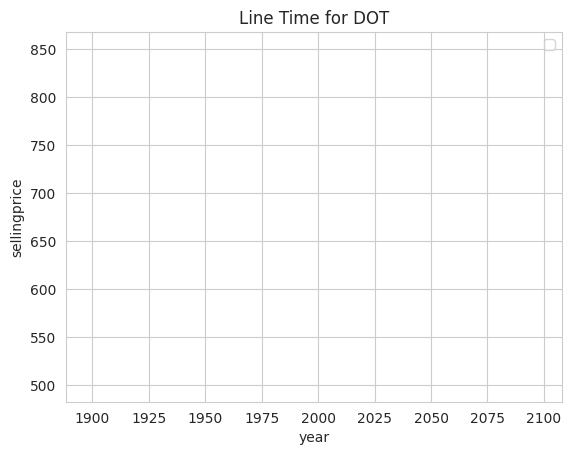

/tmp/ipython-input-3327920642.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


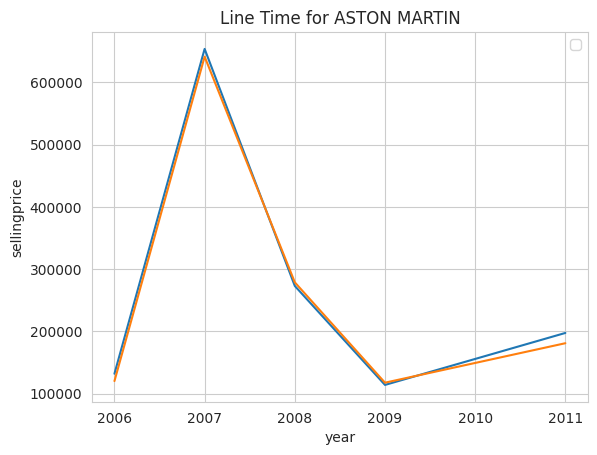

/tmp/ipython-input-3327920642.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


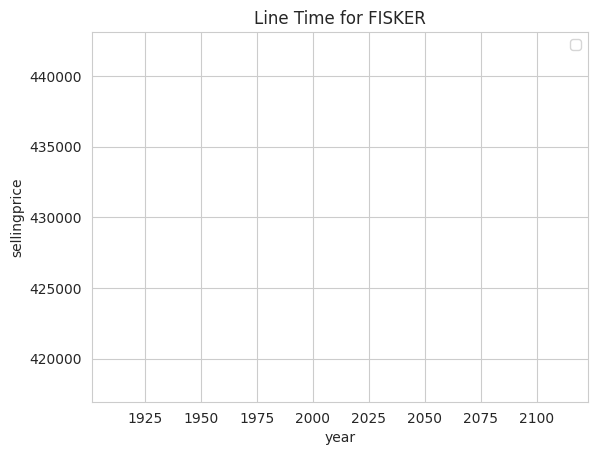

/tmp/ipython-input-3327920642.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


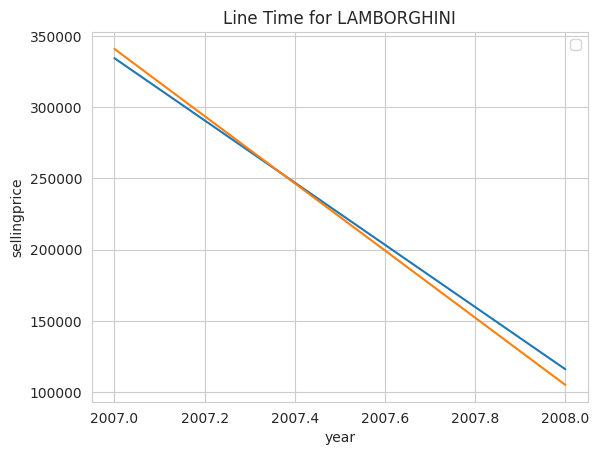

/tmp/ipython-input-3327920642.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


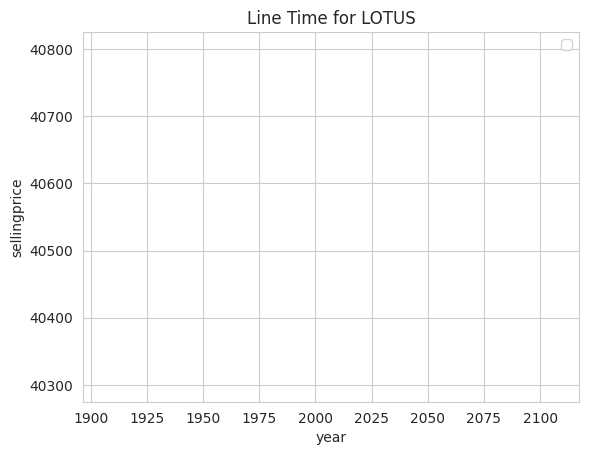

In [52]:
for maker in df_imputado_rf['make'].unique():
  df_imputado_rf_maker = df_imputado_rf[df_imputado_rf['make'] == maker]
  g = df_imputado_rf_maker.pivot_table(index='year',values=['sellingprice', 'mmr'],aggfunc='sum').reset_index()

  sns.lineplot(data=g,x='year',y='sellingprice')
  sns.lineplot(data=g,x='year',y='mmr')
  plt.title(f"Line Time for {maker}")
  plt.legend()
  plt.show()

In [53]:
df_imputado_rf['saledate_date'] = df_imputado_rf['saledate'].dt.date

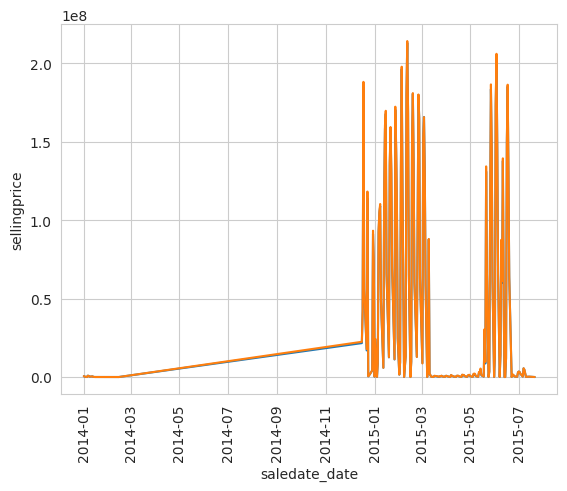

In [54]:
h = df_imputado_rf.pivot_table(index='saledate_date',values=['sellingprice', 'mmr'],aggfunc='sum').reset_index()
sns.lineplot(data=h,x='saledate_date',y='sellingprice')
sns.lineplot(data=h,x='saledate_date',y='mmr')
plt.xticks(rotation=90)
plt.show()

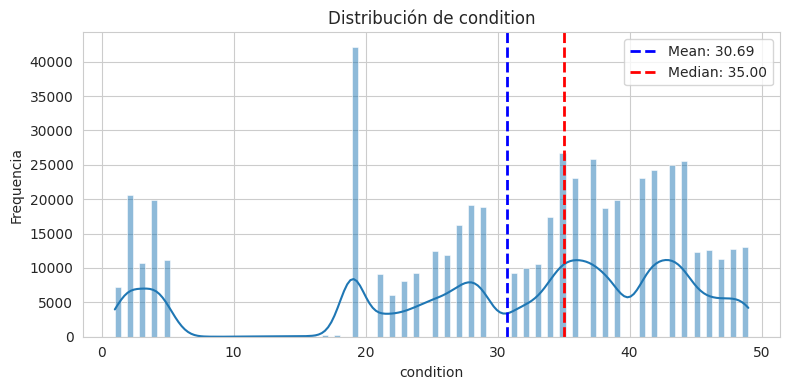

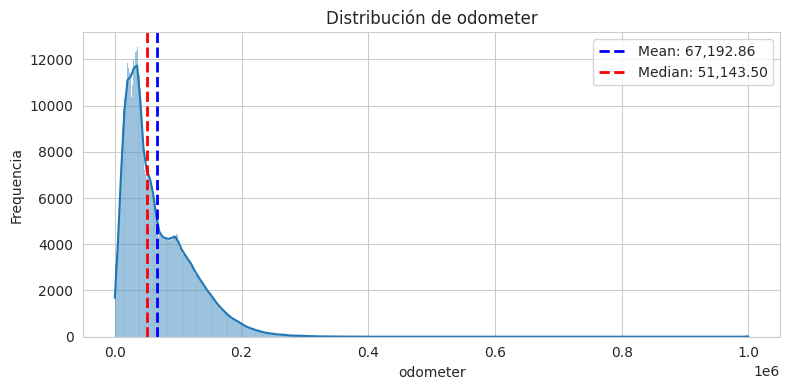

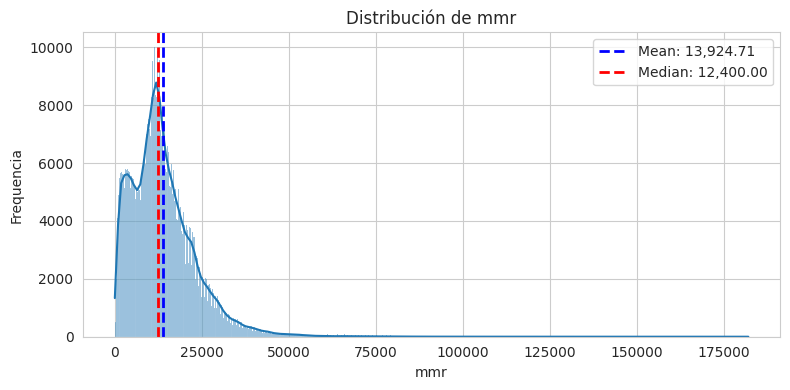

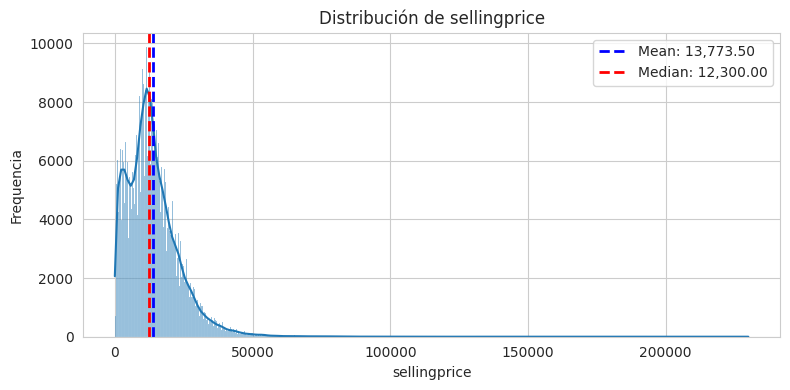

In [55]:
numeric_cols = df.select_dtypes(include=['float64']).columns
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col].dropna(), kde=True)

    plt.title(f'Distribución de {col}')
    median = df[col].dropna().median()
    mean = df[col].dropna().mean()
    plt.axvline(mean, color='blue', linestyle='--', linewidth=2, label=f'Mean: {mean:,.2f}')
    plt.axvline(median, color='red', linestyle='--', linewidth=2, label=f'Median: {median:,.2f}')
    ymin, ymax = plt.ylim()
    plt.tight_layout()
    plt.legend()
    plt.xlabel(col)
    plt.ylabel('Frequencia')
    plt.show()

Al observar los histogramas de frecuencia y las curvas de densidad, notamos que:

+ **Condición:** la variable condición es multimodal, se logra observar mínimo 6 modas, las cuales seguramente están asociadas o relacionadas con la Marca, el Modelo, la Carrocería o quizás hasta con la Transmisión. Imputar esta columna con una Medida de Tendencia Central sería incorrecto, porque estos valores medios no representarán algunas de las modas o sub-distribuciones que se presentan en la variable, lo conveniente es realizar una imputación predictiva usando los valores observados de las demás columnas, y de esta forma, aprovechar las asociaciones o relaciones lineales y no lineales que puedan existir con las demás variables.

+ **Odometro:** La distribución del odometro es asimétrica, particularmente, la media es mayor que la mediana, esto indica que, la distribución presenta un sesgo de cola derecha; es decir, la mayoría de vehículos tienen un kilometraje concentrado en los valores más bajos de la distribución, son muy pocos los vehículos que superan los 200.000 kms. Aquí, imputar los 94 datos tienen nulos, sería incorrecto usar el promedio, mejor, se podría usar la mediana por ser insensible a valores atípicos, la decisión del método de imputación se define a través de un algoritmo predictivo que considere los valores observados en las demás columnas del conjunto de datos.

+ **Precio Estimado Mercado:** La distribución del precio estimado en el mercado es asimétrica, particularmente, la media es mayor que la mediana, esto indica que, la distribución presenta un sesgo de cola derecha; es decir, la mayoría de vehículos tienen un precio estimado concentrado en valores más bajos de la distribución, son muy pocos los vehículos que superan los $25.000. Al imputar los 12 nulos, no se recomienda usar el promedio, es mejor, usar la mediana por ser insensible a valores atípicos, la decisión del método de imputación se define a través de un algoritmo predictivo que considere los valores observados en las demás columnas del conjunto de datos.

+ **Precio de Venta:** La distribución del precio de venta es asimétrica, particularmente, la media es mayor que la mediana, esto indica que, la distribución presenta un sesgo de cola derecha; es decir, la mayoría de vehículos tienen un precio de venta concentrado en los valores más bajos de la distribución, son muy pocos los vehículos que superan los $40.000. Al imputar los 12 nulos, no se recomienda usar el promedio, es mejor, usar la mediana por ser insensible a valores atípicos, la decisión del método de imputación se define a través de un algoritmo predictivo que considere los valores observados en las demás columnas del conjunto de datos.

In [3]:
# First than all we save the clean data
import pandas as pd
cleaned_data_path = "/content/drive/MyDrive/CarPricesStreamlitApp/data/cleaned_data.csv"
#df_imputado_rf.to_csv(cleaned_data_path, index=False)

In [13]:
# Load cleaned data significant variables so we can train the model
df_models = pd.read_csv(cleaned_data_path, encoding='utf-8')

In [41]:
df_models.iloc[600,:]

,600
year,2013.0
make,NISSAN
model,ROGUE
trim,S
body,SUV
transmission,automatic
vin,jn8as5mv7dw126624
state,ca
condition,39.0
odometer,41214.0


Después de haber hecho un análisis de los resultados de 4 modelos se eligió RandomForestRegressor como el mejor modelo para nuestro análisis, una vez seleccionado se determinaron las variables más relevantes para este modelo y se realizó un proceso de fine-tuning para determinar los mejores parámetros para el modelo RandomForestRegressor. En el código de abajo ya se tienen en cuenta esos resultados y simplemente nos limitamos a entrenar el modelo RandomForest con las variables importantes y los mejores parámetros para posteriormente guardarlo en archivo pkl y poder usarlo luego en el dashboard. Tengamos en cuenta que antes de entrenar el modelo se escalan las variables numéricas y se codifican las variables categóricas. El scaler y el encoding se guardan en archivos punto joblib para ser usados posteriormente cuando se ingresen nuevos datos

In [87]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pickle
import time
import joblib
import warnings
warnings.filterwarnings('ignore')

df_models = df_models[['make', 'model', 'trim', 'body', 'condition', 'odometer', 'sellingprice']]
target = df_models.pop('sellingprice')
num_cols_sc = df_models.select_dtypes(include=[np.number]).columns.tolist()

scaler = StandardScaler()
scaled_values = scaler.fit_transform(df_models[num_cols_sc])
# Guardar el scaler
scaler_path = "/content/drive/MyDrive/CarPricesStreamlitApp/data/scaler.joblib"
joblib.dump(scaler, scaler_path)

df_models[num_cols_sc] = scaled_values

df_models['sellingprice'] = target

In [88]:
encoders = {}

cat_cols_en = df_models.select_dtypes(include=['object']).columns.tolist()

for col in cat_cols_en:
    encoder = LabelEncoder()
    df_models[col] = encoder.fit_transform(df_models[col])
    encoders[col] = encoder  # Guardar en diccionario

# Guardar todos los encoders en un solo archivo
joblib.dump(encoders, "/content/drive/MyDrive/CarPricesStreamlitApp/data/label_encoders.joblib")


['/content/drive/MyDrive/CarPricesStreamlitApp/data/label_encoders.joblib']

Preparing data for machine learning...
Dataset shape: (557750, 6)
Target variable shape: (557750,)
Features: ['make', 'model', 'trim', 'body', 'condition', 'odometer']

Training set size: 446,200 samples
Testing set size: 111,550 samples
  R² Score: 0.9223
  RMSE: $2,740.01


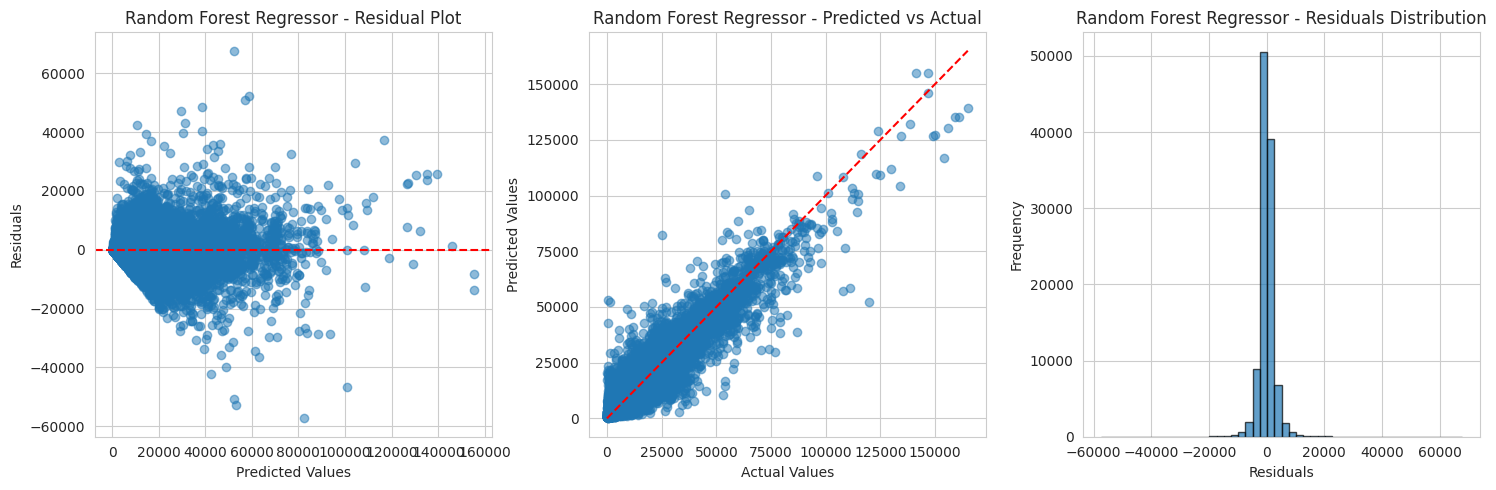

In [89]:

# Prepare features and target
print("Preparing data for machine learning...")
X = df_models.drop('sellingprice', axis=1)
y = df_models['sellingprice']

print(f"Dataset shape: {X.shape}")
print(f"Target variable shape: {y.shape}")
print(f"Features: {list(X.columns)}")

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"\nTraining set size: {X_train.shape[0]:,} samples")
print(f"Testing set size: {X_test.shape[0]:,} samples")
def calculate_mape(y_true, y_pred):
    """Calculate Mean Absolute Percentage Error"""
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def evaluate_model(model, X_test, y_test, model_name):
    """Evaluate a trained model and return metrics"""
    y_pred = model.predict(X_test)

    metrics = {
        'Model': model_name,
        'MAE': mean_absolute_error(y_test, y_pred),
        'MSE': mean_squared_error(y_test, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
        'R2_Score': r2_score(y_test, y_pred),
        'MAPE': calculate_mape(y_test, y_pred)
    }

    return metrics, y_pred

model = RandomForestRegressor(n_estimators=500,
                              min_samples_split=10,
                              min_samples_leaf=1,
                              max_features=None,
                              max_depth=30,
                              bootstrap=True,
                              random_state=42)

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
best_model_name = 'Random Forest Regressor'
metrics, best_predictions = evaluate_model(model, X_test, y_test, best_model_name)

print(f"  R² Score: {metrics['R2_Score']:.4f}")
print(f"  RMSE: ${metrics['RMSE']:,.2f}")

# Residual plot for the best model
plt.figure(figsize=(15, 5))

# Residual plot
plt.subplot(1, 3, 1)
residuals = y_test - best_predictions
plt.scatter(best_predictions, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title(f'{best_model_name} - Residual Plot')

# Prediction vs Actual scatter plot
plt.subplot(1, 3, 2)
plt.scatter(y_test, best_predictions, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'{best_model_name} - Predicted vs Actual')

# Residuals distribution
plt.subplot(1, 3, 3)
plt.hist(residuals, bins=50, alpha=0.7, edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title(f'{best_model_name} - Residuals Distribution')

plt.tight_layout()
plt.show()

Aquí se guarda el modelo para usarlo luego en la interfaz con Streamlit

In [90]:
model_path = "/content/drive/MyDrive/CarPricesStreamlitApp/data/best_model_random_forest.pkl"
with open(model_path, 'wb') as file:
    pickle.dump(model, file)
